In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
rcParams['figure.dpi'] = 200

In [3]:
! wget 'https://raw.githubusercontent.com/bioFAM/mofax/master/data/models/pbmc10k.hdf5'

--2025-03-13 06:34:25--  https://raw.githubusercontent.com/bioFAM/mofax/master/data/models/pbmc10k.hdf5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16895807 (16M) [application/octet-stream]
Saving to: ‘pbmc10k.hdf5’

pbmc10k.hdf5        100%[===================>]  16.11M  69.7MB/s    in 0.2s    

2025-03-13 06:34:26 (69.7 MB/s) - ‘pbmc10k.hdf5’ saved [16895807/16895807]



In [4]:
!pip install --q mofax

In [5]:
import mofax as mfx
m = mfx.mofa_model("pbmc10k.hdf5")

In [6]:
print(f"""\
Cells: {m.shape[0]}
Features: {m.shape[1]}
Groups of cells: {', '.join(m.groups)}
Views: {', '.join(m.views)}
""")

Cells: 10575
Features: 2071
Groups of cells: group1
Views: rna



In [7]:
# HDF5 group
print("HDF5 group:\n", m.weights)

# np.ndarray
print("\nnp.ndarray:\n", m.get_weights()[:3,:5])

# pd.DataFrame
print("\npd.DataFrame:\n", m.get_weights(df=True).iloc[:3,:5])

HDF5 group:
 <HDF5 group "/expectations/W" (1 members)>

np.ndarray:
 [[ 3.97031541e-04 -2.14016519e-04 -9.70952784e-03  1.42689823e-04
   2.17236696e-04]
 [ 2.27657894e-01 -1.17120174e-04 -8.19302633e-02  2.52041376e-05
   1.39462012e-05]
 [-5.08148227e-02 -7.67944288e-04 -1.57304689e-01  4.31494817e-02
  -8.83336484e-04]]

pd.DataFrame:
          Factor1   Factor2   Factor3   Factor4   Factor5
KLHL17  0.000397 -0.000214 -0.009710  0.000143  0.000217
HES4    0.227658 -0.000117 -0.081930  0.000025  0.000014
ISG15  -0.050815 -0.000768 -0.157305  0.043149 -0.000883


In [8]:
m

MOFA+ model: pbmc10k
Samples (cells): 10575
Features: 2071
Groups: group1 (10575)
Views: rna (2071)
Factors: 10
Expectations: W, Z

In [9]:
m.factors

<HDF5 group "/expectations/Z" (1 members)>

In [10]:
m.get_factors()

array([[-0.89933482,  0.06441617, -0.42637834, ..., -0.2638521 ,
        -0.76839326, -0.34212716],
       [ 1.58092509, -0.14822086, -0.49356212, ...,  0.04676491,
         1.41061209,  1.48625242],
       [-1.13292063,  0.60220472, -1.69640419, ...,  0.32039088,
        -0.11644942,  0.21981179],
       ...,
       [-1.0367666 ,  0.03692204, -0.55731721, ..., -0.24100138,
         0.43747674,  0.06024526],
       [-0.99159794,  0.18965867, -0.38563594, ...,  0.08866474,
        -0.03256565, -0.12978764],
       [-1.02508696, -0.0108361 , -0.32227446, ..., -0.2547037 ,
         0.23590093,  0.07134145]])

In [11]:
m.get_factors(df=True)

Factor1   Factor2   Factor3   Factor4   Factor5  \
AAACCCAAGCGCCCAT-1 -0.899335  0.064416 -0.426378 -0.598963  0.016424   
AAACCCACAGAGTTGG-1  1.580925 -0.148221 -0.493562 -0.106085 -0.176860   
AAACCCACAGGTATGG-1 -1.132921  0.602205 -1.696404  3.529500  0.066467   
AAACCCACATAGTCAC-1 -0.529319 -1.123459  2.475830  0.806409 -0.430388   
AAACCCACATCCAATG-1 -1.026881  0.380889 -1.178453  2.552806  0.069686   
...                      ...       ...       ...       ...       ...   
TTTGTTGGTGCGTCGT-1 -1.082191  0.040199 -0.284399 -0.972092 -0.132995   
TTTGTTGGTGTCATGT-1  1.087620 -0.109122 -0.514156 -0.421514 -0.175393   
TTTGTTGGTTTGAACC-1 -1.036767  0.036922 -0.557317 -0.001919 -0.093817   
TTTGTTGTCCAAGCCG-1 -0.991598  0.189659 -0.385636 -0.647373 -0.134568   
TTTGTTGTCTTACTGT-1 -1.025087 -0.010836 -0.322274 -1.146333 -0.115967   

                     Factor6   Factor7   Factor8   Factor9  Factor10  
AAACCCAAGCGCCCAT-1  0.267293  1.023139 -0.263852 -0.768393 -0.342127  
AAACCCACAGAGTTGG-1 -1.878662 -0.062656  0.046765  1.410612  1.486252  
AAACCCACAGGTATGG-1  0.045470 -2.164745  0.320391 -0.116449  0.219812  
AAACCCACATAGTCAC-1 -0.054994  0.340566 -0.083696  1.337353 -0.938365  
AAACCCACATCCAATG-1  0.075156 -0.093734 -0.323234 -0.188269  0.222552  
...                      ...       ...       ...       ...       ...  
TTTGTTGGTGCGTCGT-1 -0.106241 -1.015529 -0.034794  0.278160  0.160063  
TTTGTTGGTGTCATGT-1 -0.878041 -0.316831 -0.168246  0.593766  0.267287  
TTTGTTGGTTTGAACC-1 -0.055962  2.402102 -0.241001  0.437477  0.060245  
TTTGTTGTCCAAGCCG-1  0.105065  1.285243  0.088665 -0.032566 -0.129788  
TTTGTTGTCTTACTGT-1 -0.047621 -1.018008 -0.254704  0.235901  0.071341  

[10575 rows x 10 columns]

In [12]:
m.get_features()

view     feature
0     rna      KLHL17
1     rna        HES4
2     rna       ISG15
3     rna    TNFRSF18
4     rna     TNFRSF4
...   ...         ...
2066  rna      COL6A2
2067  rna  MCM3AP-AS1
2068  rna    C21orf58
2069  rna       DIP2A
2070  rna       S100B

[2071 rows x 2 columns]

In [13]:
m.get_cells()

group                cell
0      group1  AAACCCAAGCGCCCAT-1
1      group1  AAACCCACAGAGTTGG-1
2      group1  AAACCCACAGGTATGG-1
3      group1  AAACCCACATAGTCAC-1
4      group1  AAACCCACATCCAATG-1
...       ...                 ...
10570  group1  TTTGTTGGTGCGTCGT-1
10571  group1  TTTGTTGGTGTCATGT-1
10572  group1  TTTGTTGGTTTGAACC-1
10573  group1  TTTGTTGTCCAAGCCG-1
10574  group1  TTTGTTGTCTTACTGT-1

[10575 rows x 2 columns]

In [14]:
m.get_data(df=True)

KLHL17      HES4     ISG15  TNFRSF18   TNFRSF4  \
AAACCCAAGCGCCCAT-1 -0.138503 -0.219358  2.261822  -0.22653 -0.240323   
AAACCCACAGAGTTGG-1 -0.138503 -0.219358 -0.684139  -0.22653 -0.240323   
AAACCCACAGGTATGG-1 -0.138503 -0.219358  1.093235  -0.22653 -0.240323   
AAACCCACATAGTCAC-1 -0.138503 -0.219358 -0.684139  -0.22653 -0.240323   
AAACCCACATCCAATG-1 -0.138503 -0.219358  1.311090  -0.22653 -0.240323   
...                      ...       ...       ...       ...       ...   
TTTGTTGGTGCGTCGT-1 -0.138503 -0.219358 -0.684139  -0.22653 -0.240323   
TTTGTTGGTGTCATGT-1 -0.138503 -0.219358 -0.684139  -0.22653 -0.240323   
TTTGTTGGTTTGAACC-1 -0.138503 -0.219358 -0.684139  -0.22653 -0.240323   
TTTGTTGTCCAAGCCG-1 -0.138503 -0.219358 -0.684139  -0.22653  3.619265   
TTTGTTGTCTTACTGT-1 -0.138503 -0.219358  0.879195  -0.22653 -0.240323   

                        CPTP  AL645728.1    MMP23B  SLC35E2A     PRKCZ  ...  \
AAACCCAAGCGCCCAT-1 -0.258533   -0.300863 -0.189757 -0.314061 -0.214440  ...   
AAACCCACAGAGTTGG-1 -0.258533   -0.300863 -0.189757 -0.314061 -0.214440  ...   
AAACCCACAGGTATGG-1 -0.258533   -0.300863 -0.189757 -0.314061 -0.214440  ...   
AAACCCACATAGTCAC-1 -0.258533   -0.300863 -0.189757 -0.314061 -0.214440  ...   
AAACCCACATCCAATG-1 -0.258533   -0.300863 -0.189757 -0.314061 -0.214440  ...   
...                      ...         ...       ...       ...       ...  ...   
TTTGTTGGTGCGTCGT-1 -0.258533   -0.300863 -0.189757 -0.314061 -0.214440  ...   
TTTGTTGGTGTCATGT-1 -0.258533   -0.300863 -0.189757 -0.314061 -0.214440  ...   
TTTGTTGGTTTGAACC-1 -0.258533   -0.300863 -0.189757 -0.314061  5.508367  ...   
TTTGTTGTCCAAGCCG-1 -0.258533   -0.300863 -0.189757 -0.314061 -0.214440  ...   
TTTGTTGTCTTACTGT-1 -0.258533   -0.300863 -0.189757 -0.314061 -0.214440  ...   

                     ICOSLG  AP001059.3  AP001059.2  AP001062.1  ITGB2-AS1  \
AAACCCAAGCGCCCAT-1 -0.18985   -0.117513   -0.143783   -0.094562  -0.396662   
AAACCCACAGAGTTGG-1 -0.18985   -0.117513   -0.143783   -0.094562  -0.396662   
AAACCCACAGGTATGG-1 -0.18985   -0.117513   -0.143783   -0.094562  -0.396662   
AAACCCACATAGTCAC-1 -0.18985   -0.117513   -0.143783   -0.094562   2.643724   
AAACCCACATCCAATG-1 -0.18985   -0.117513   -0.143783   -0.094562  -0.396662   
...                     ...         ...         ...         ...        ...   
TTTGTTGGTGCGTCGT-1 -0.18985   -0.117513   -0.143783   -0.094562  -0.396662   
TTTGTTGGTGTCATGT-1 -0.18985   -0.117513   -0.143783   -0.094562  -0.396662   
TTTGTTGGTTTGAACC-1 -0.18985   -0.117513   -0.143783   -0.094562  -0.396662   
TTTGTTGTCCAAGCCG-1 -0.18985   -0.117513   -0.143783   -0.094562  -0.396662   
TTTGTTGTCTTACTGT-1 -0.18985   -0.117513   -0.143783   -0.094562  -0.396662   

                      COL6A2  MCM3AP-AS1  C21orf58     DIP2A     S100B  
AAACCCAAGCGCCCAT-1 -0.236702   -0.158811 -0.124872 -0.517221 -0.235697  
AAACCCACAGAGTTGG-1 -0.236702   -0.158811 -0.124872 -0.517221 -0.235697  
AAACCCACAGGTATGG-1 -0.236702   -0.158811 -0.124872 -0.517221 -0.235697  
AAACCCACATAGTCAC-1 -0.236702   -0.158811 -0.124872 -0.517221 -0.235697  
AAACCCACATCCAATG-1 -0.236702   -0.158811 -0.124872 -0.517221 -0.235697  
...                      ...         ...       ...       ...       ...  
TTTGTTGGTGCGTCGT-1 -0.236702   -0.158811 -0.124872 -0.517221 -0.235697  
TTTGTTGGTGTCATGT-1 -0.236702   -0.158811 -0.124872 -0.517221 -0.235697  
TTTGTTGGTTTGAACC-1  3.816530   -0.158811 -0.124872 -0.517221 -0.235697  
TTTGTTGTCCAAGCCG-1 -0.236702   -0.158811 -0.124872 -0.517221 -0.235697  
TTTGTTGTCTTACTGT-1 -0.236702   -0.158811 -0.124872 -0.517221 -0.235697  

[10575 rows x 2071 columns]

/usr/local/lib/python3.11/dist-packages/mofax/plot_weights.py:134: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna({"to_label": False})


<Axes: title={'center': 'rna'}, xlabel='Feature weight'>

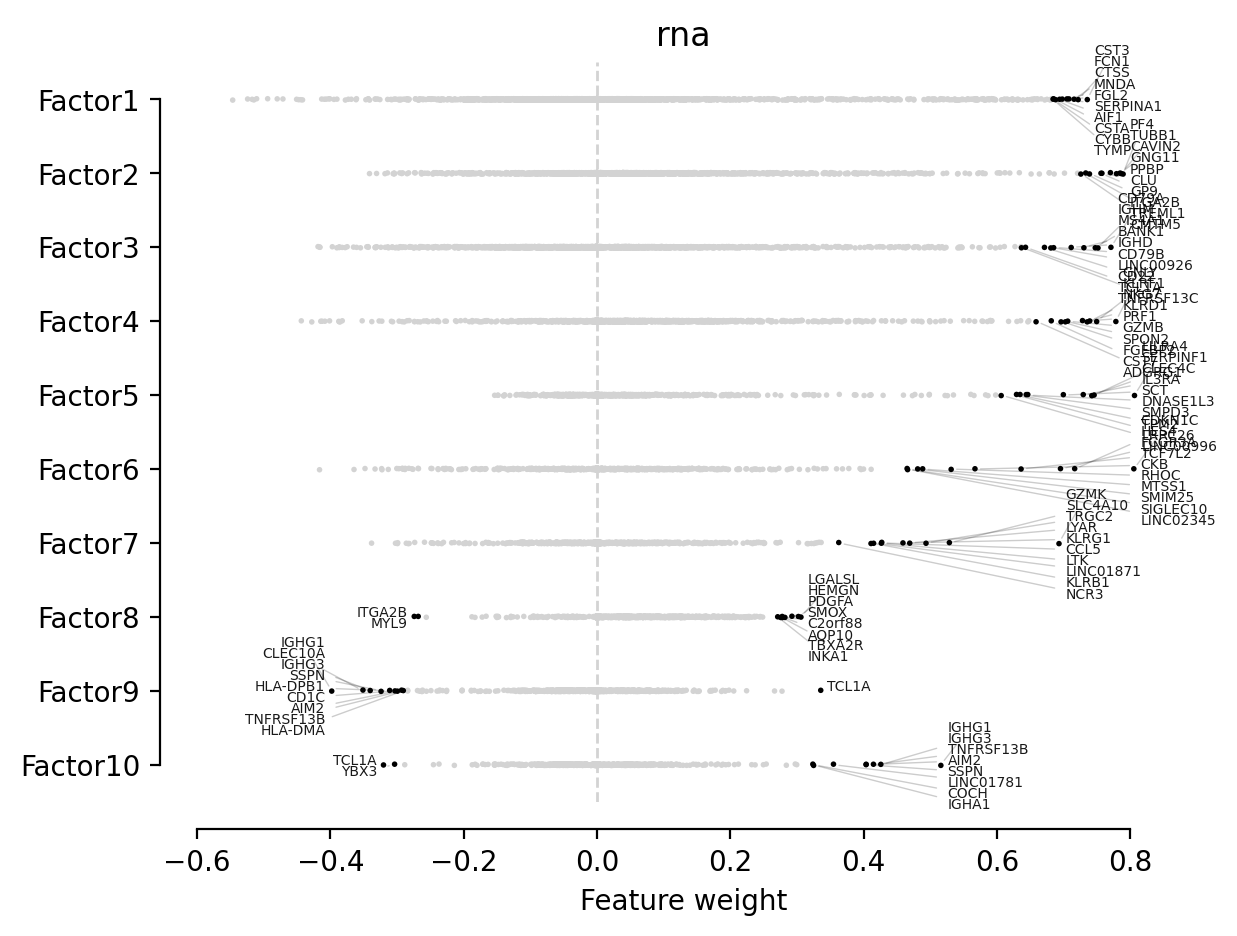

In [15]:
mfx.plot_weights(m, n_features=10)

<Axes: xlabel='Feature rank', ylabel='Factor3 weight'>

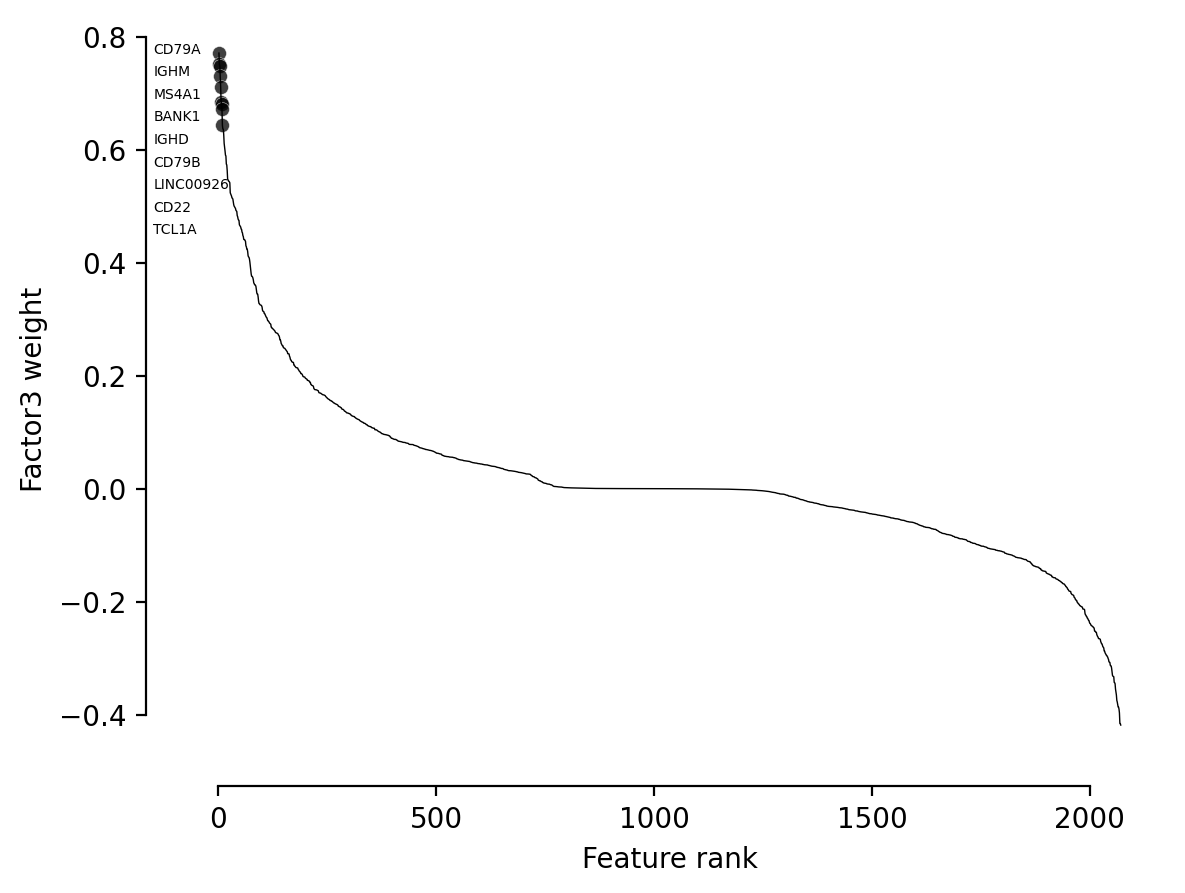

In [16]:
mfx.plot_weights_ranked(m, factor=2, n_features=10,
                             y_repel_coef=0.04, x_rank_offset=-150)

<Axes: xlabel='Feature rank', ylabel='Factor8 weight'>

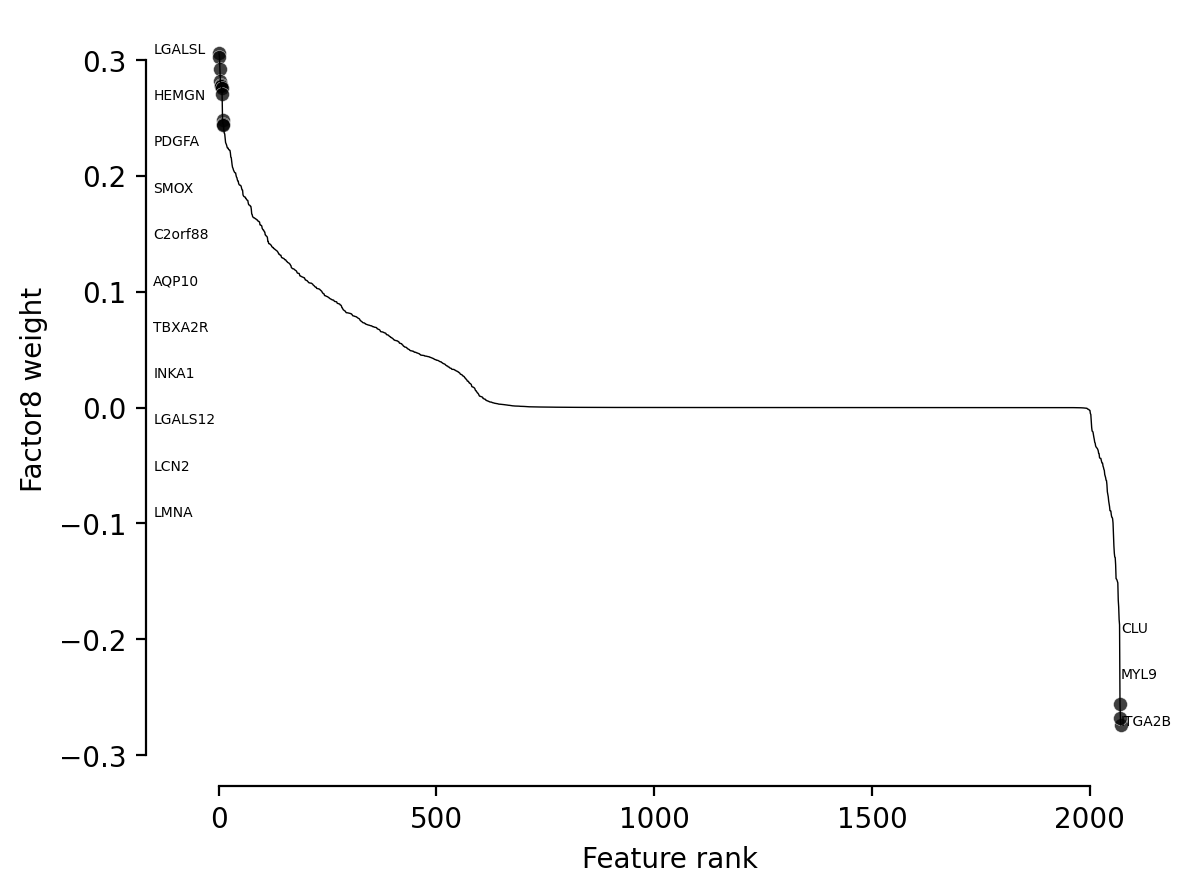

In [19]:
mfx.plot_weights_ranked(m, factor=7, n_features=15,
                             y_repel_coef=0.04, x_rank_offset=-150)

Text(0.5, 1.0, 'B cells factor')

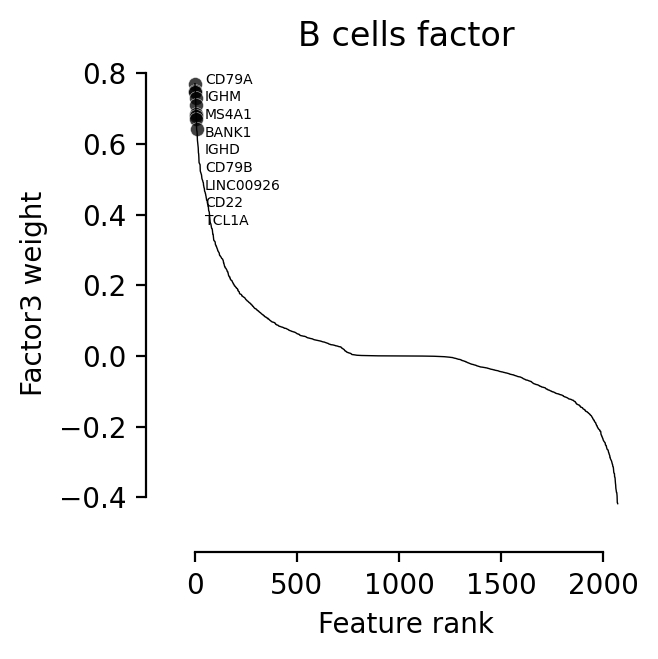

In [23]:
plt.figure(figsize=(3,3))
ax = mfx.plot_weights_ranked(m, factor=2, n_features=10,
                             y_repel_coef=0.05, x_rank_offset=50)
ax.set_title("B cells factor")

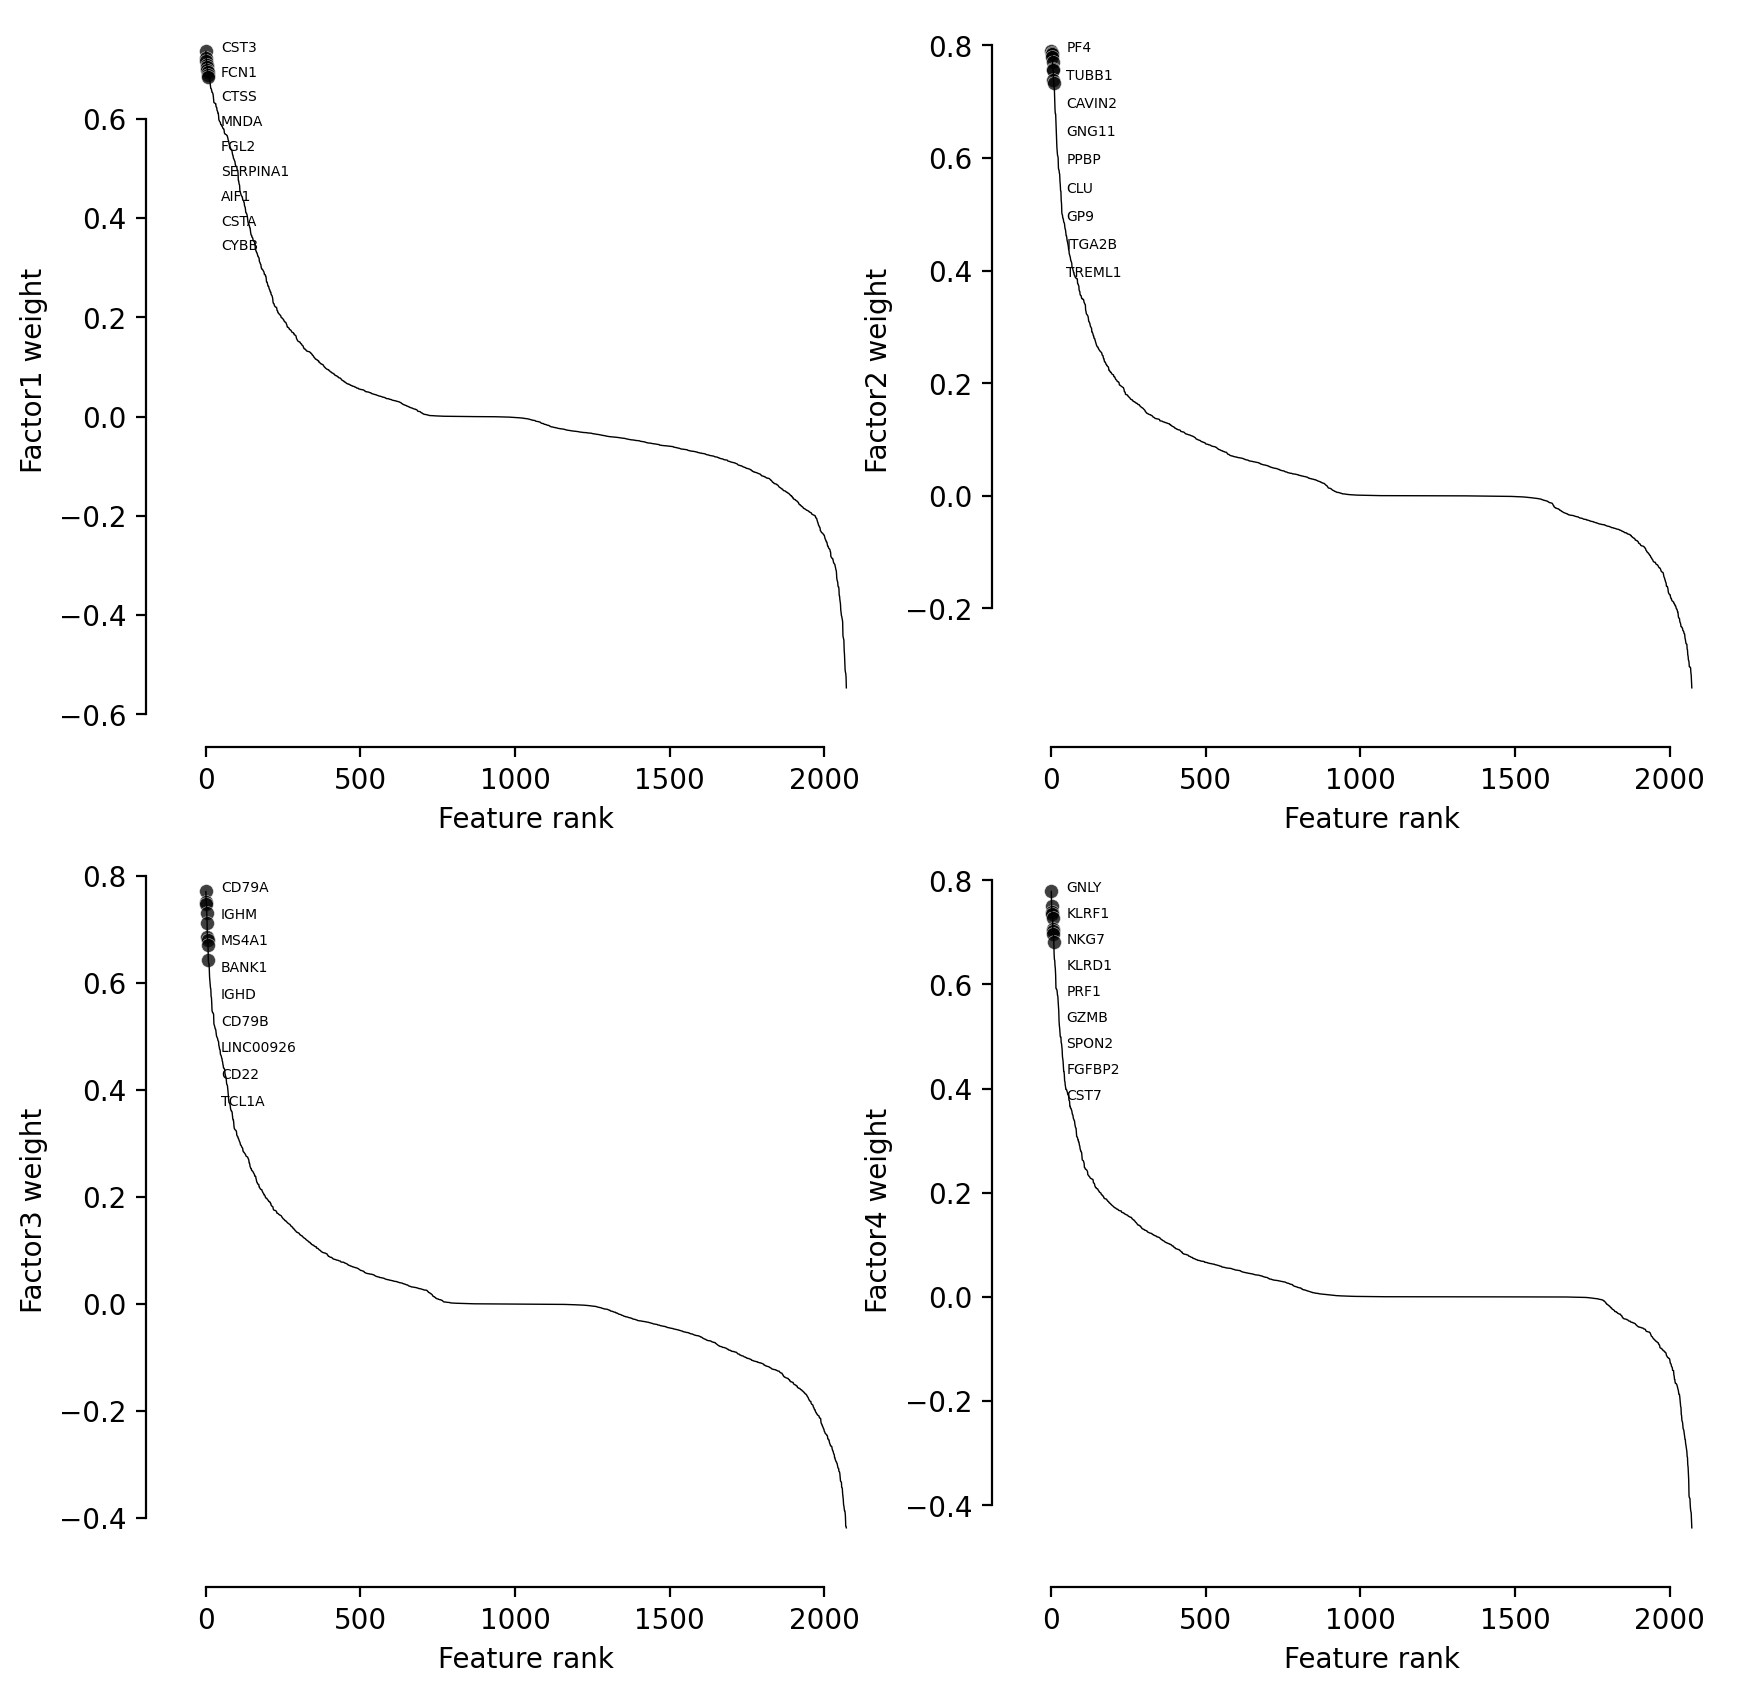

In [24]:
nf = 2  # specify number of rows & columns
f, axarr = plt.subplots(nf, nf, figsize=(10,10))
fnum = 0
for i in range(nf):
    for j in range(nf):
        mfx.plot_weights_ranked(m,
                                # The trick here is to make a plot using a particular axis
                                factor=fnum, ax=axarr[i][j],
                                n_features=10, x_rank_offset=50,
                                y_repel_coef=0.05, attract_to_points=False)
        fnum+=1

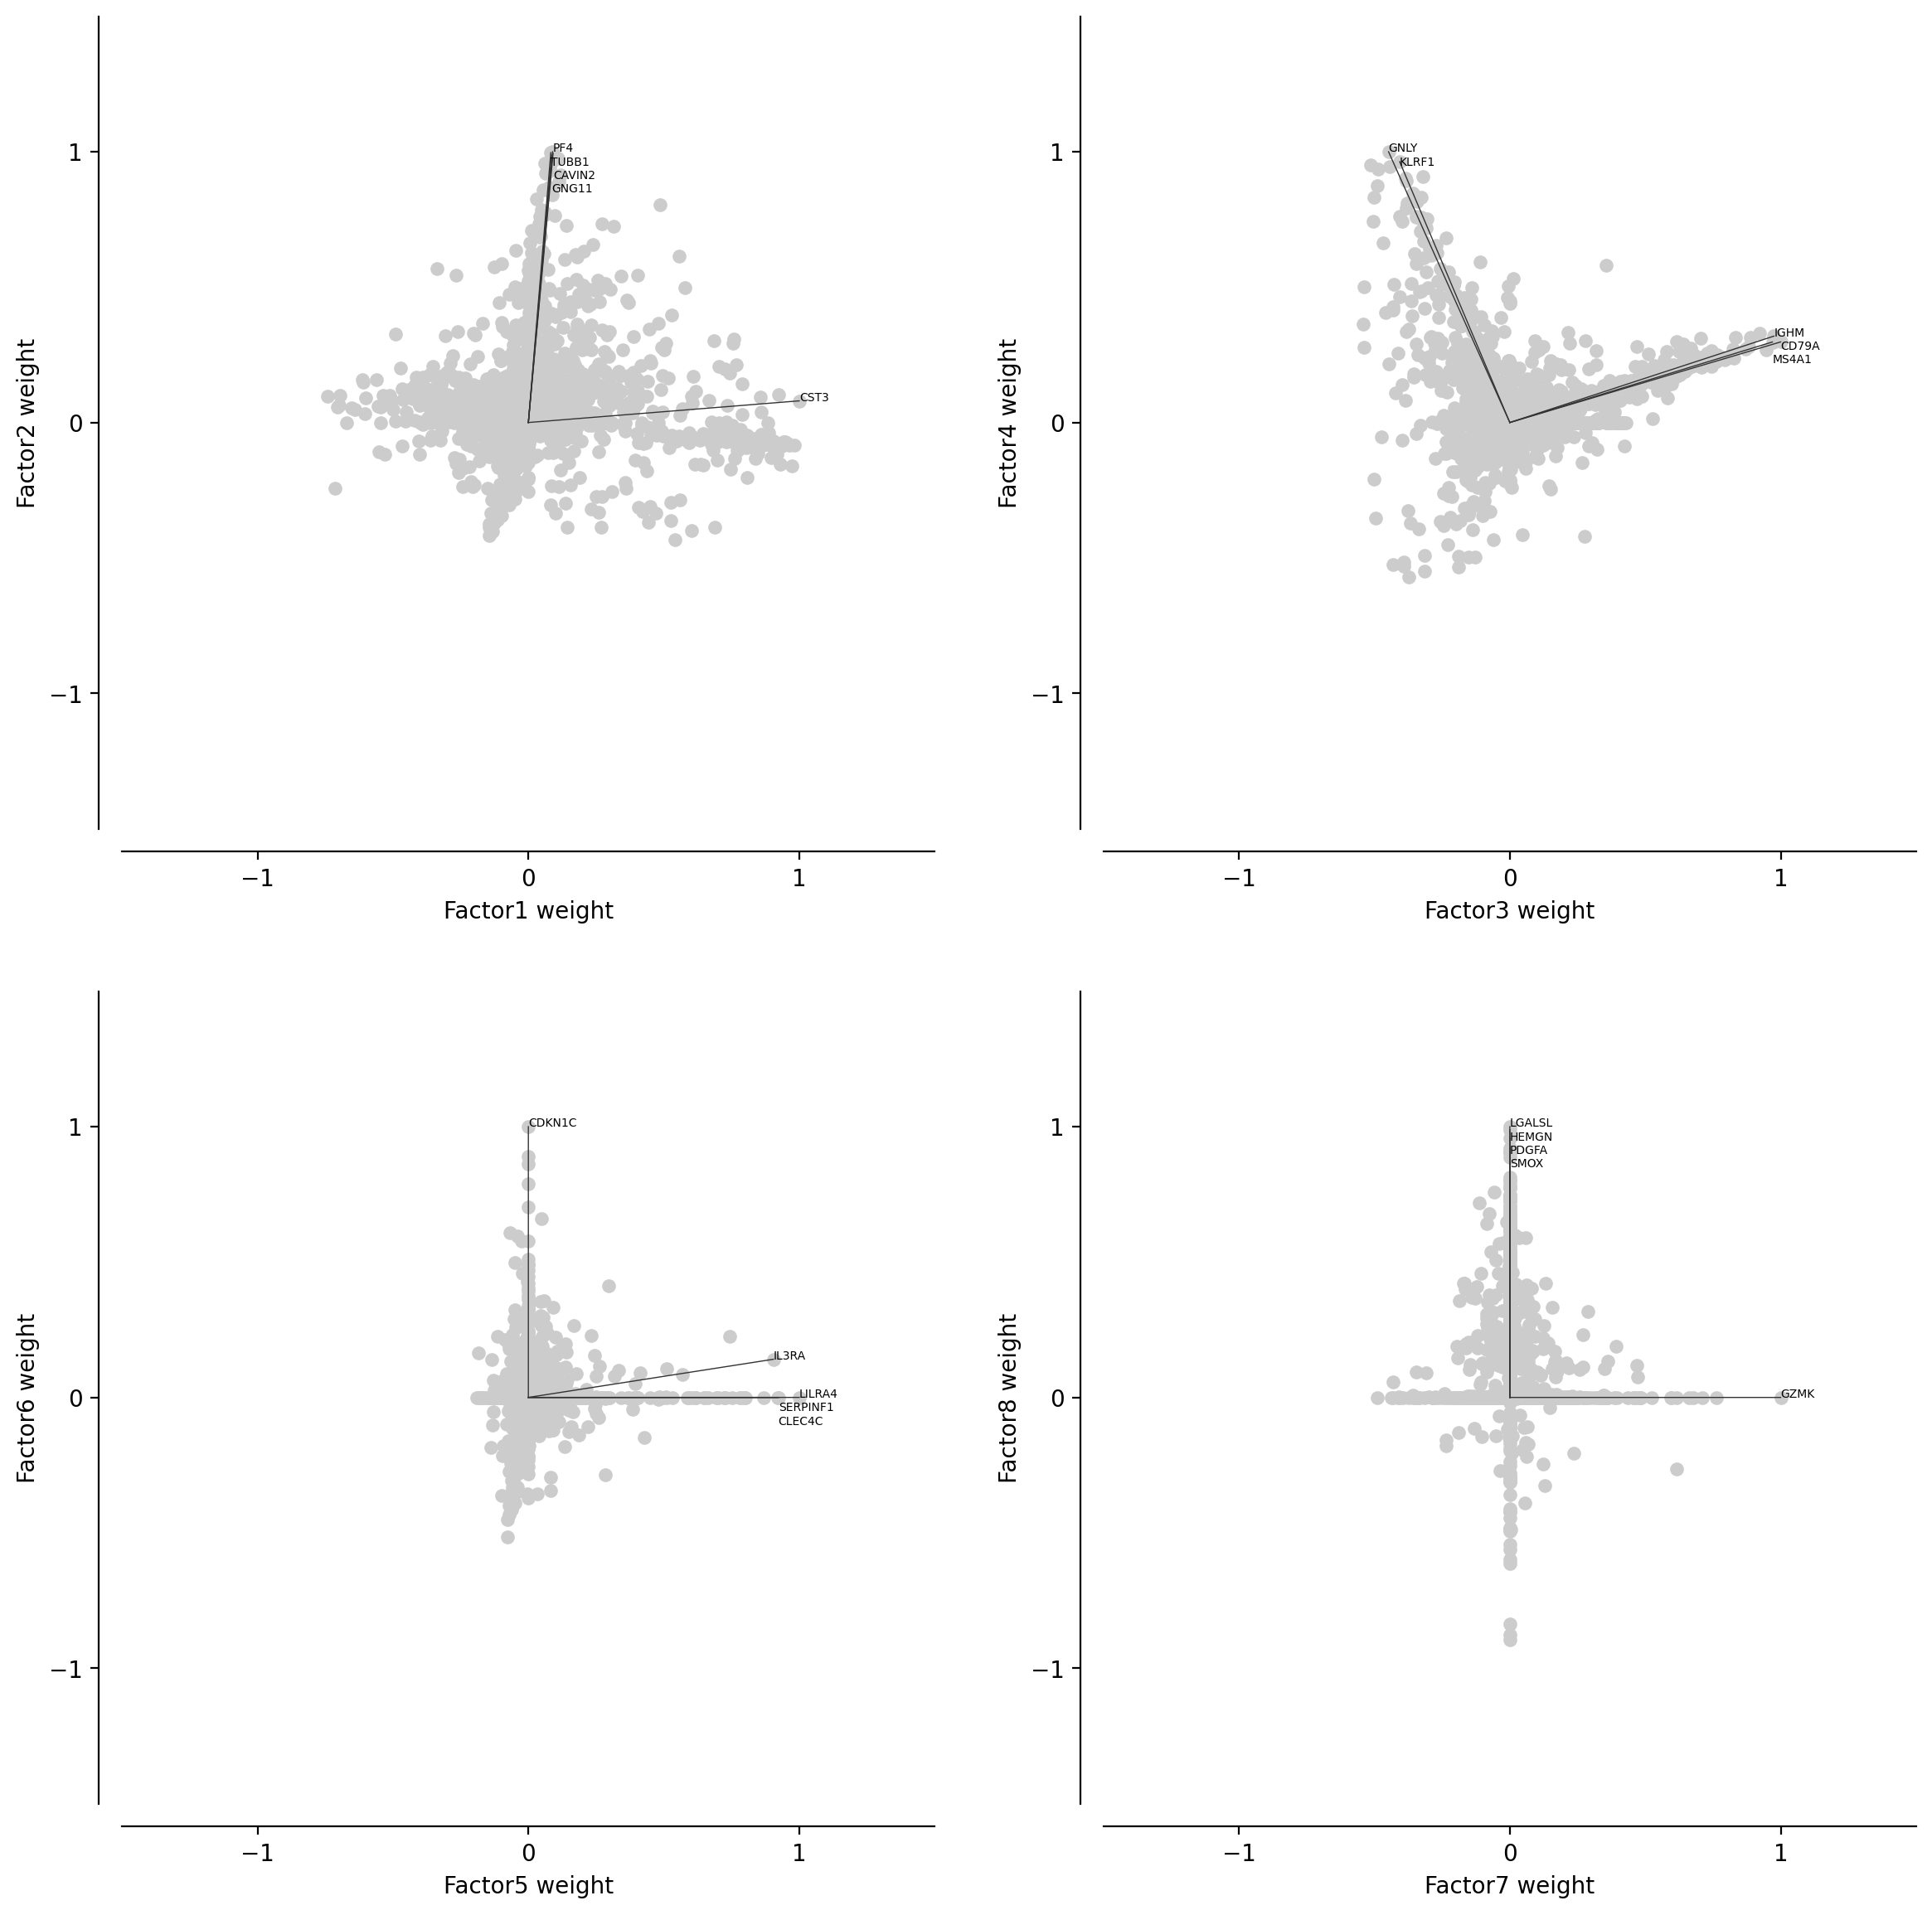

In [25]:
nf = 2
f, axarr = plt.subplots(nf, nf, figsize=(14,14))
fnum = 0
for i in range(nf):
    for j in range(nf):
        mfx.plot_weights_scaled(m, x=fnum, y=fnum+1, n_features=5, ax=axarr[i][j])
        fnum+=2

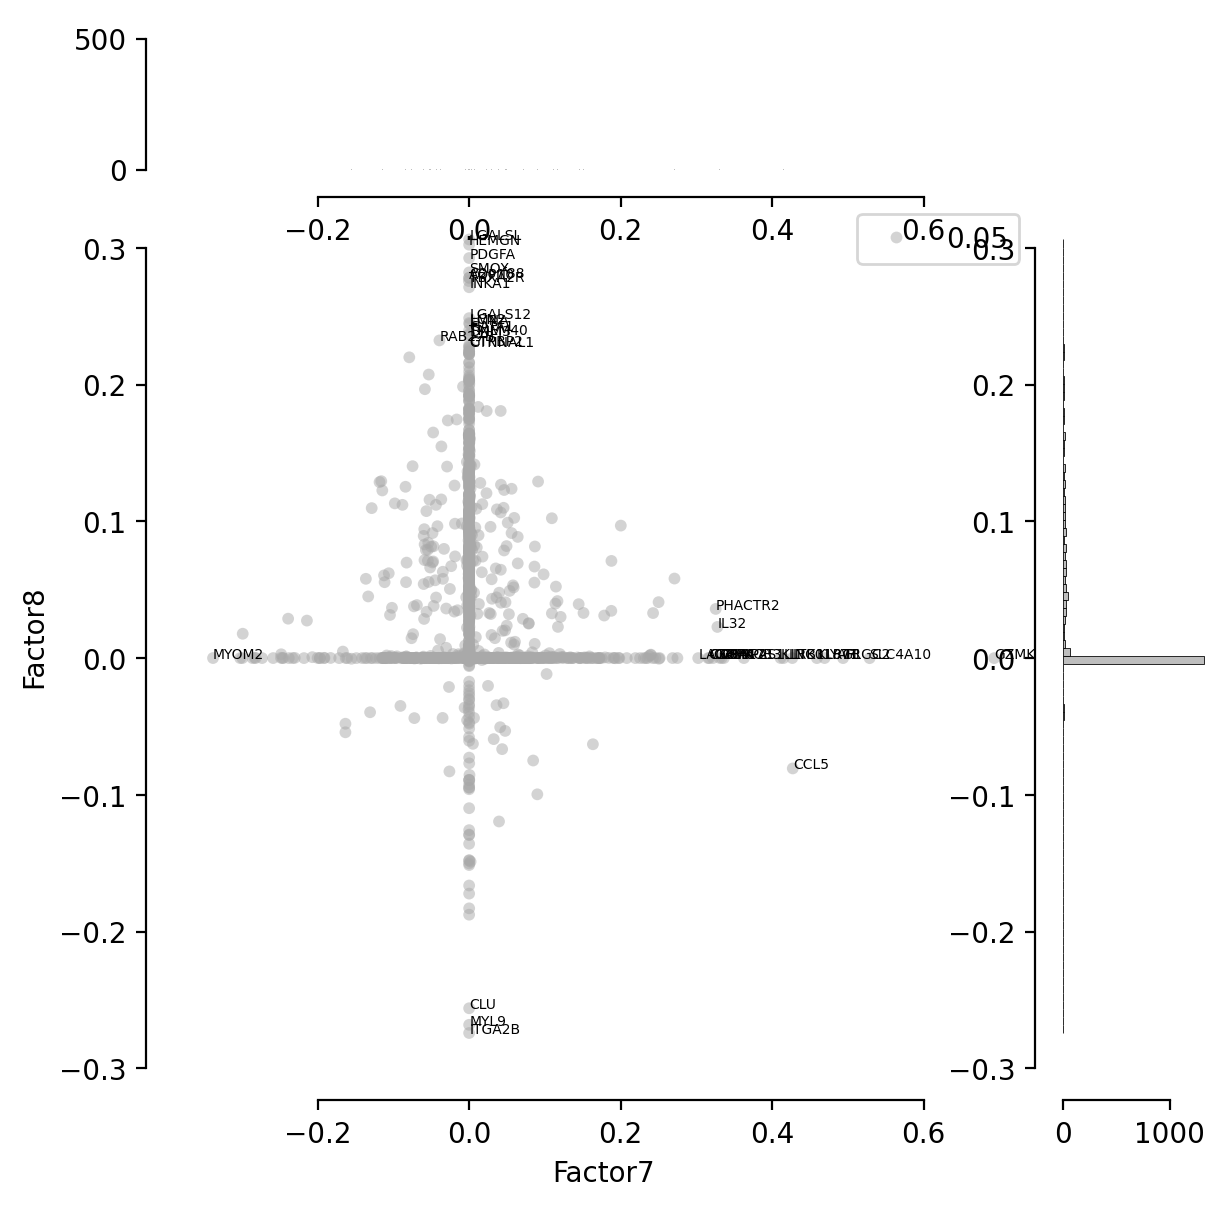

In [29]:
mfx.plot_weights_scatter(m, x="Factor7", y="Factor8",
                         hist=True, n_features=20,
                         size=0.05, linewidth=0, alpha=0.5)

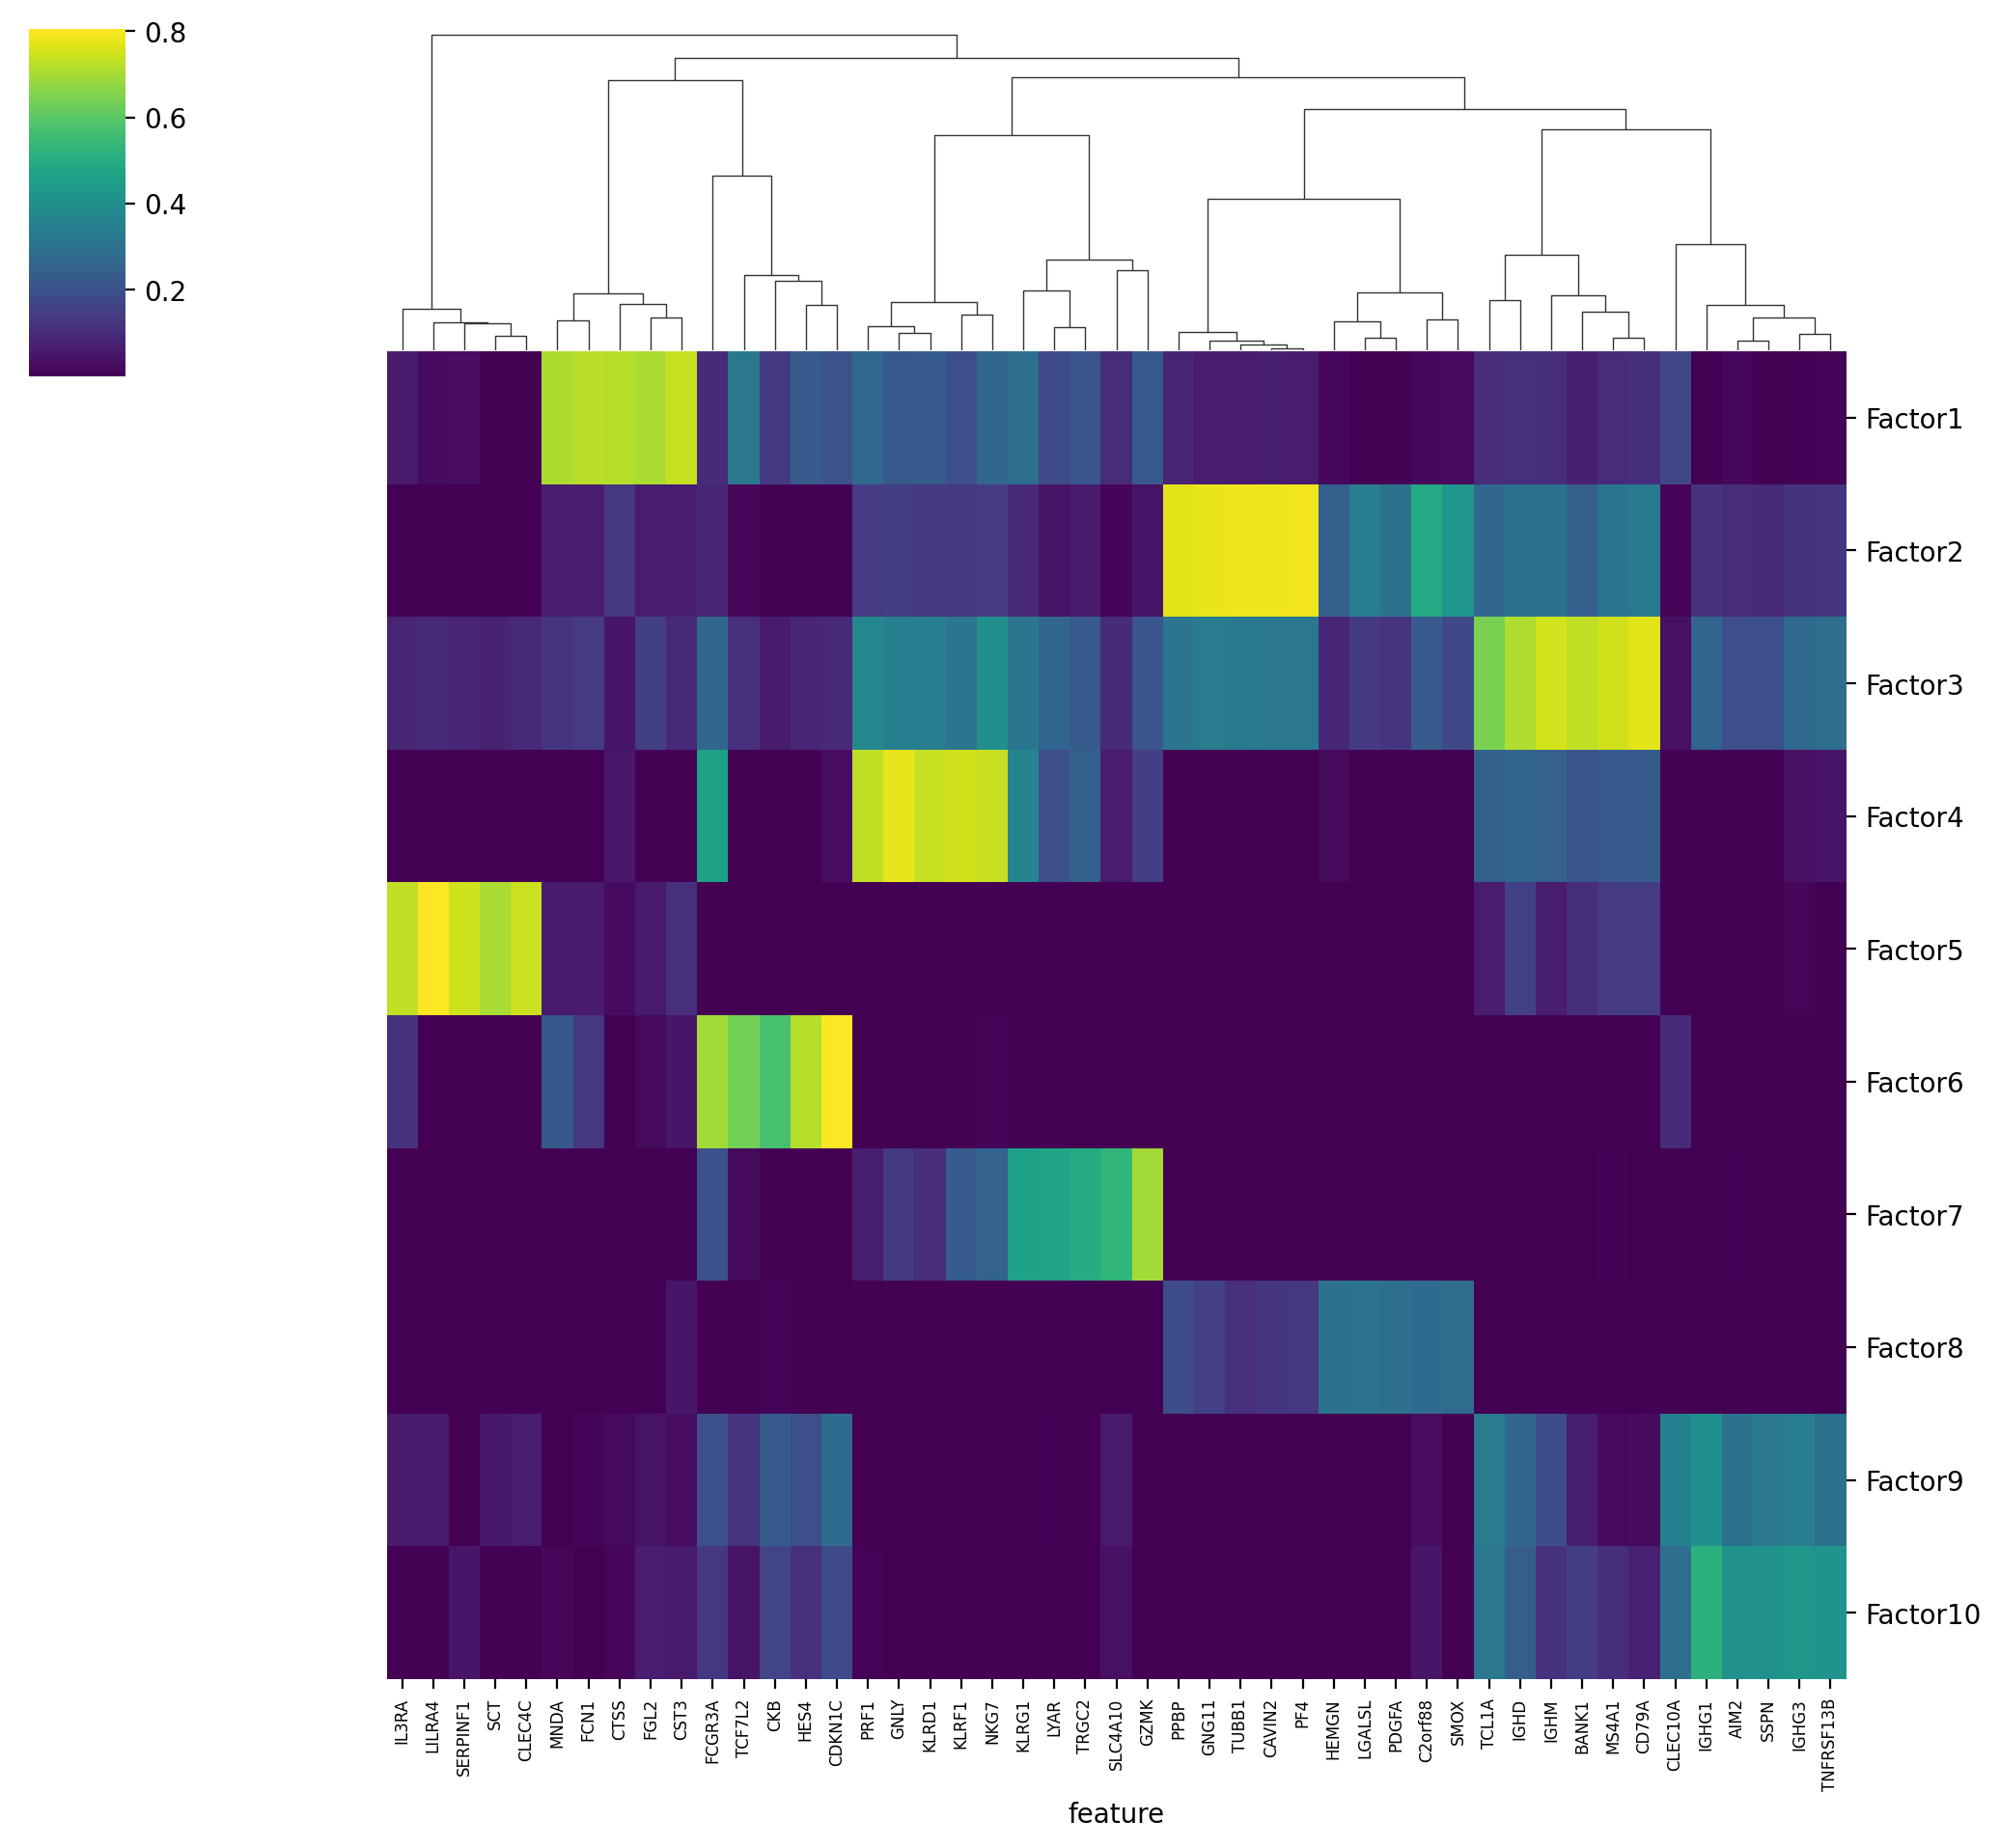

In [30]:
mfx.plot_weights_heatmap(m, n_features=5,
                         factors=range(0, 10),
                         xticklabels_size=6, w_abs=True,
                         cmap="viridis", cluster_factors=False)

In [31]:
features_all = m.get_weights(df=True).index.values
ig_col = ['#007788' if i.startswith("IG") else '#DDDDDD' for i in features_all]
ig_df = pd.DataFrame({"feature": features_all,
                       "value": ig_col}).set_index('feature')

ig_df.sort_values("value").head(10)

value
feature         
IGFBP3   #007788
IGHD     #007788
IGHM     #007788
IGF2BP2  #007788
IGFBP7   #007788
IGHA1    #007788
IGHG2    #007788
IGHG4    #007788
IGF1R    #007788
IGHA2    #007788

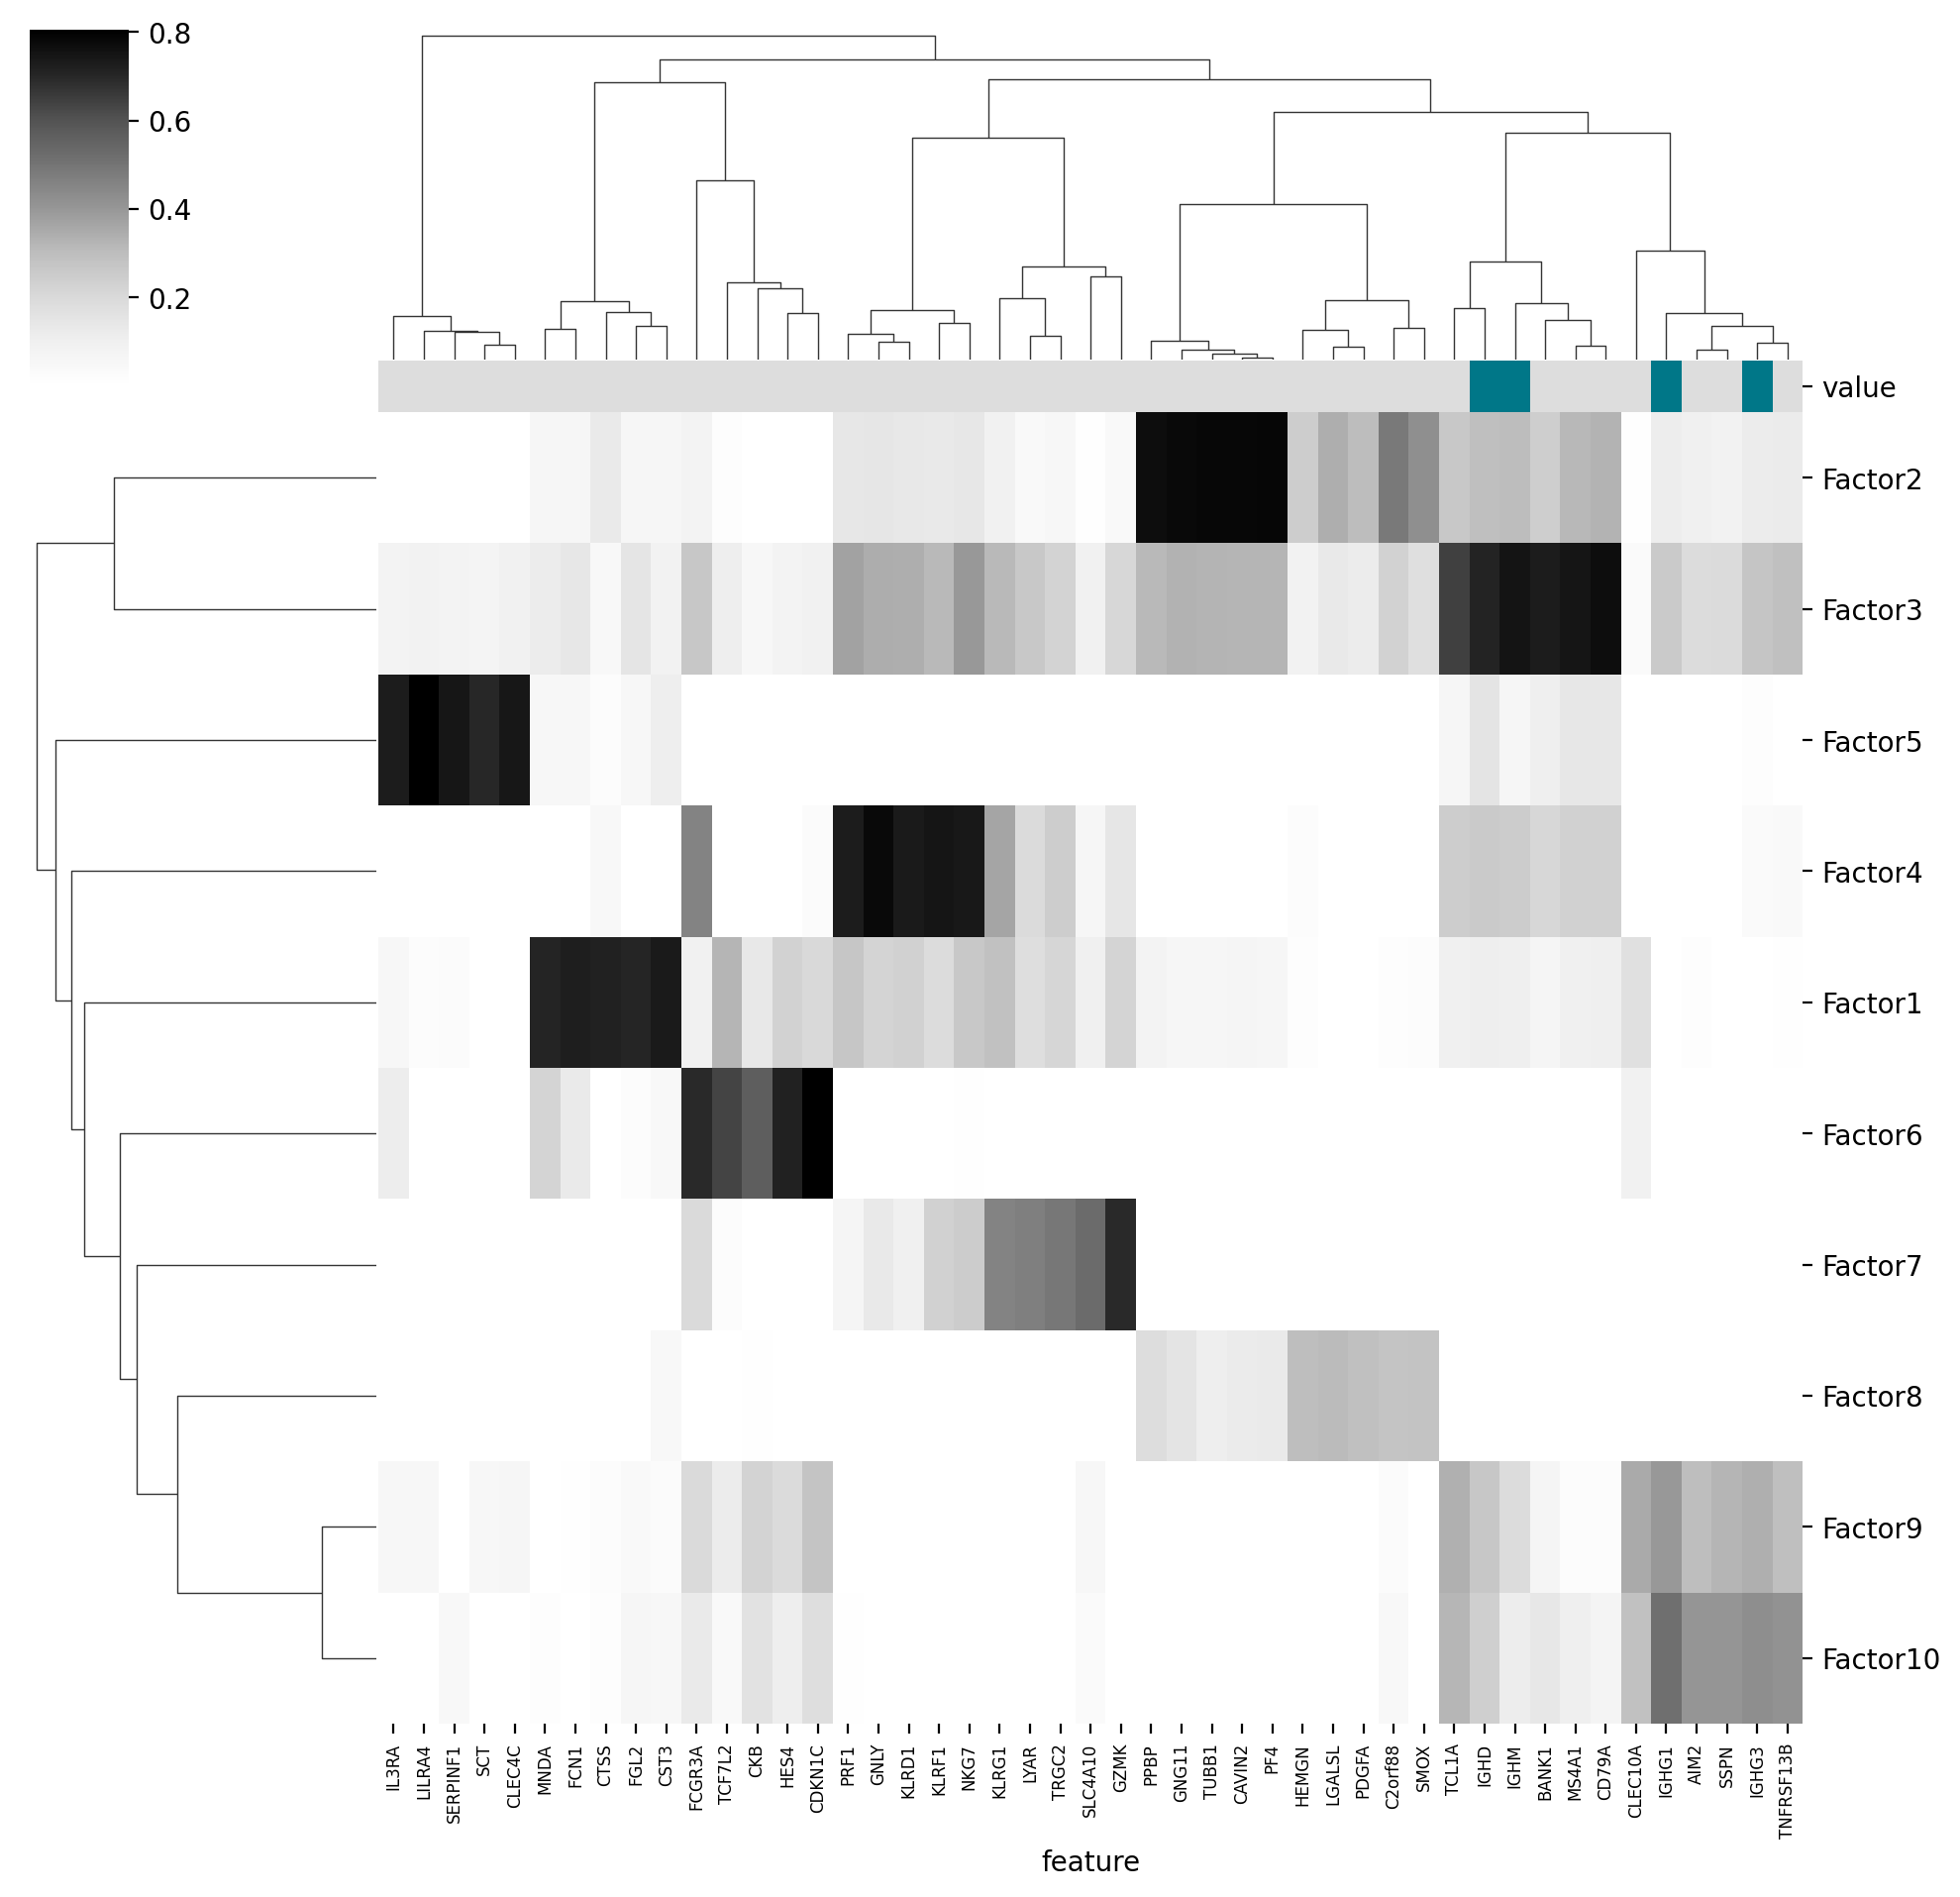

In [32]:
mfx.plot_weights_heatmap(m, n_features=5,
                         factors=range(0, 10),
                         features_col=ig_df,
                         xticklabels_size=6, w_abs=True,
                         cmap="Greys")

/usr/local/lib/python3.11/dist-packages/mofax/plot_weights.py:728: UserWarning: Cannot make a proper colorbar
  warn("Cannot make a proper colorbar")


<Axes: title={'center': 'rna'}, xlabel='factor', ylabel='feature'>

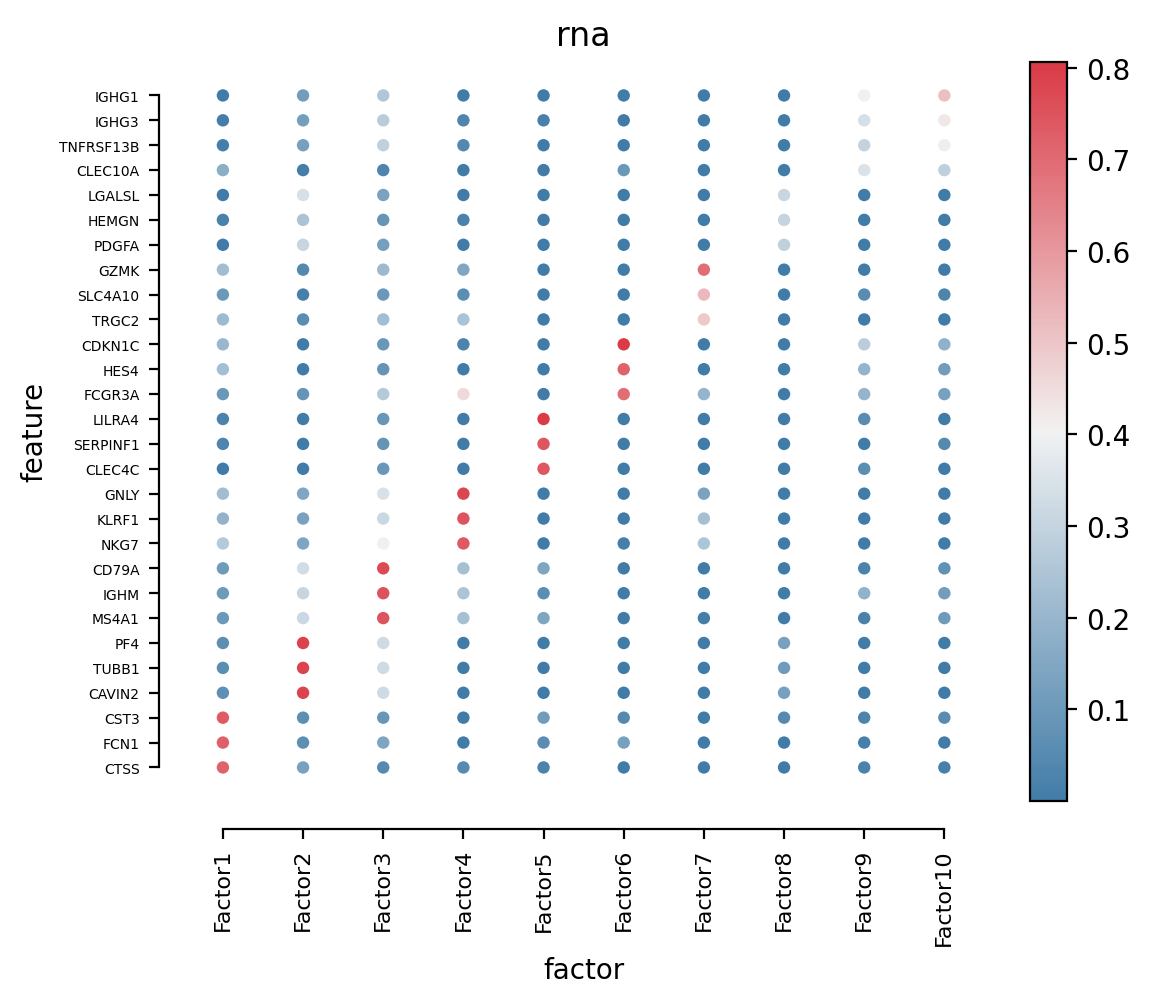

In [34]:
mfx.plot_weights_dotplot(m, n_features=3,
                         w_abs=True,
                         factors=list(range(10)),
                         yticklabels_size=5)

<Axes: >

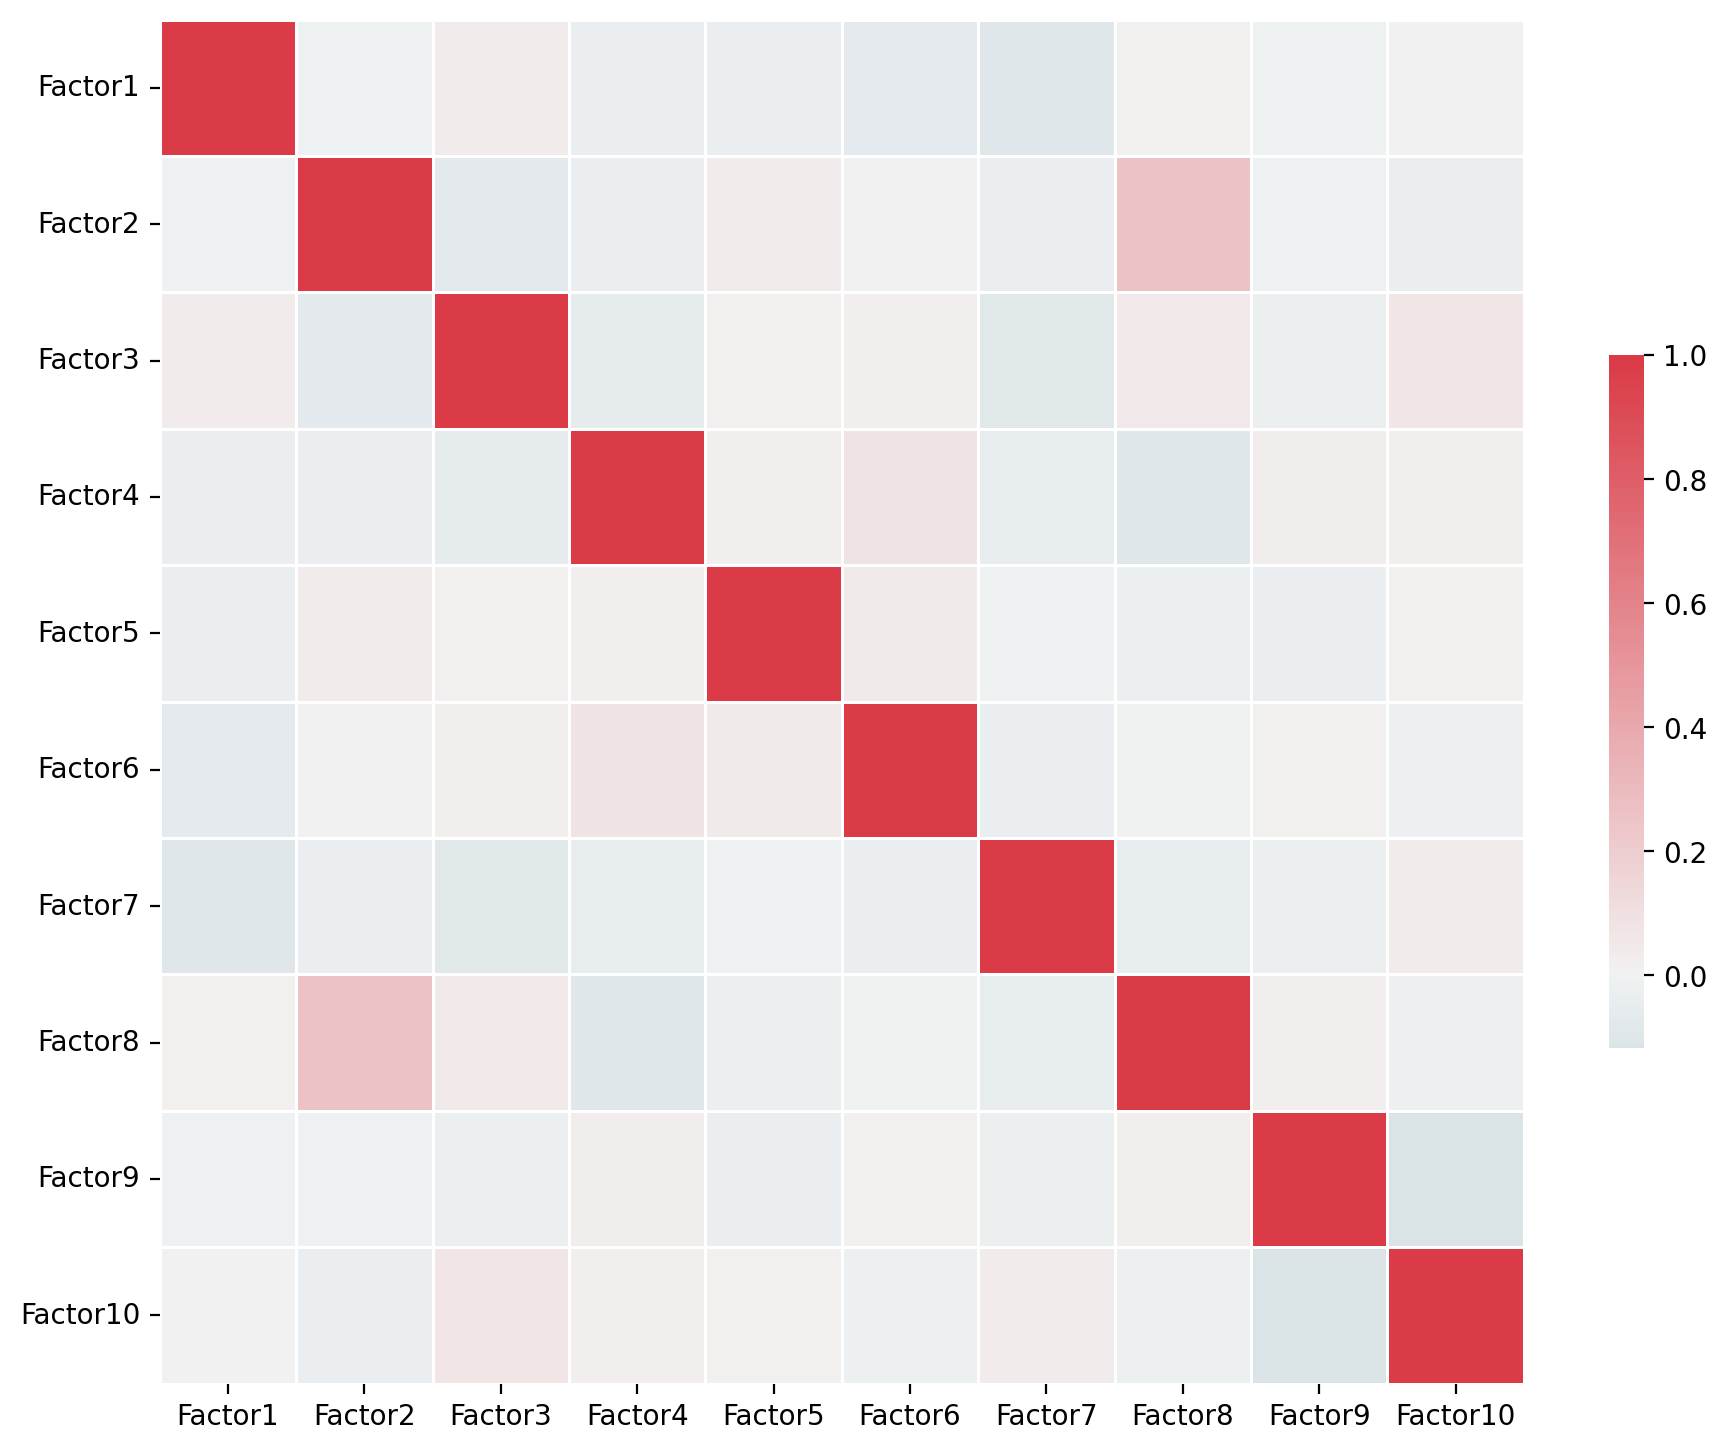

In [35]:
mfx.plot_weights_correlation(m)

In [36]:
m.get_r2(2).sort_values("R2", ascending=False)

Factor View   Group        R2
2  Factor3  rna  group1  0.030091

In [38]:
m.get_r2(factors=list(range(10))).sort_values("R2", ascending=False).head(10)

Factor View   Group        R2
0   Factor1  rna  group1  0.064007
1   Factor2  rna  group1  0.032982
2   Factor3  rna  group1  0.030091
3   Factor4  rna  group1  0.019148
4   Factor5  rna  group1  0.007797
5   Factor6  rna  group1  0.007059
6   Factor7  rna  group1  0.005120
7   Factor8  rna  group1  0.004900
8   Factor9  rna  group1  0.002957
9  Factor10  rna  group1  0.002786

from matplotlib import pyplot as plt
_df_0['R2'].plot(kind='hist', bins=20, title='R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

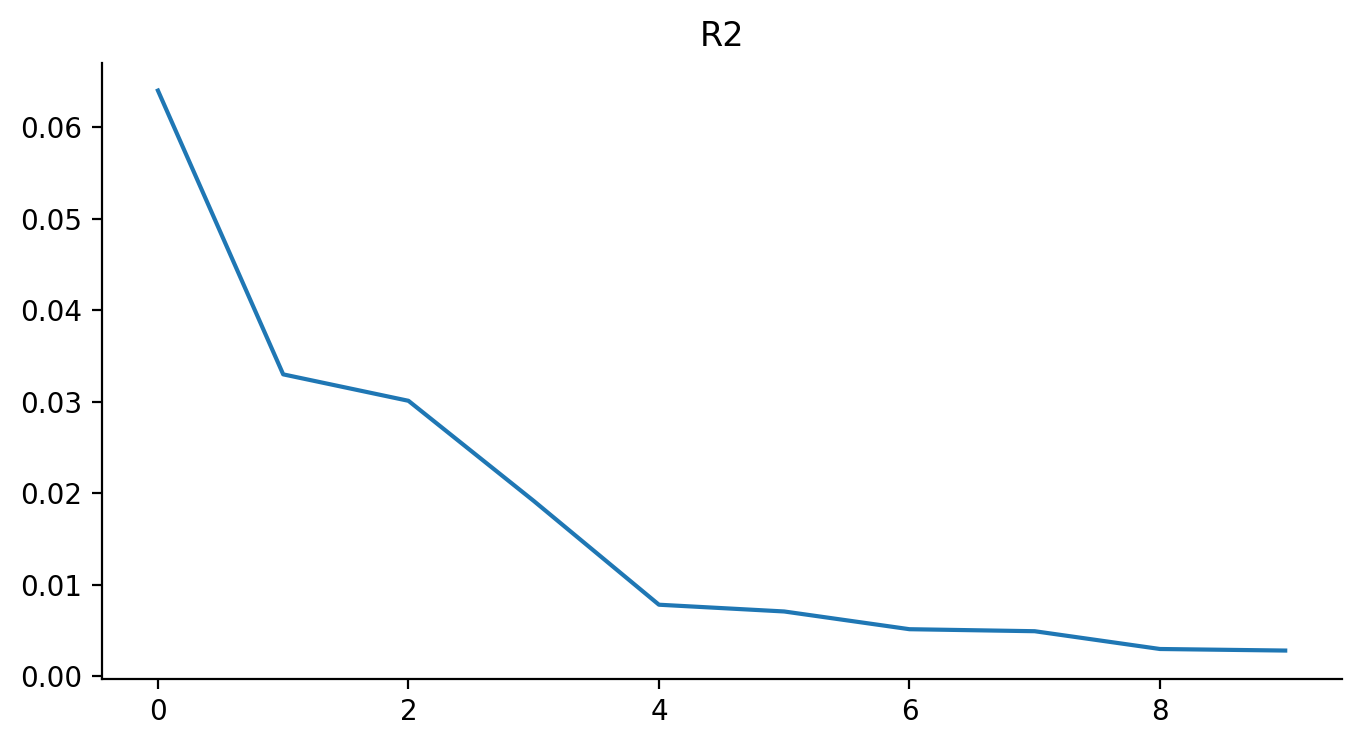

In [40]:
from matplotlib import pyplot as plt
_df_1['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [41]:
!wget https://raw.githubusercontent.com/bioFAM/mofax/refs/heads/master/data/pbmc10k_celltypes.csv

--2025-03-13 07:12:45--  https://raw.githubusercontent.com/bioFAM/mofax/refs/heads/master/data/pbmc10k_celltypes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 326607 (319K) [text/plain]
Saving to: ‘pbmc10k_celltypes.csv’

pbmc10k_celltypes.c 100%[===================>] 318.95K  --.-KB/s    in 0.05s   

2025-03-13 07:12:45 (6.90 MB/s) - ‘pbmc10k_celltypes.csv’ saved [326607/326607]



In [42]:
celltypes = pd.read_csv("pbmc10k_celltypes.csv").set_index("cell")

In [43]:
m.metadata = m.metadata.join(celltypes)

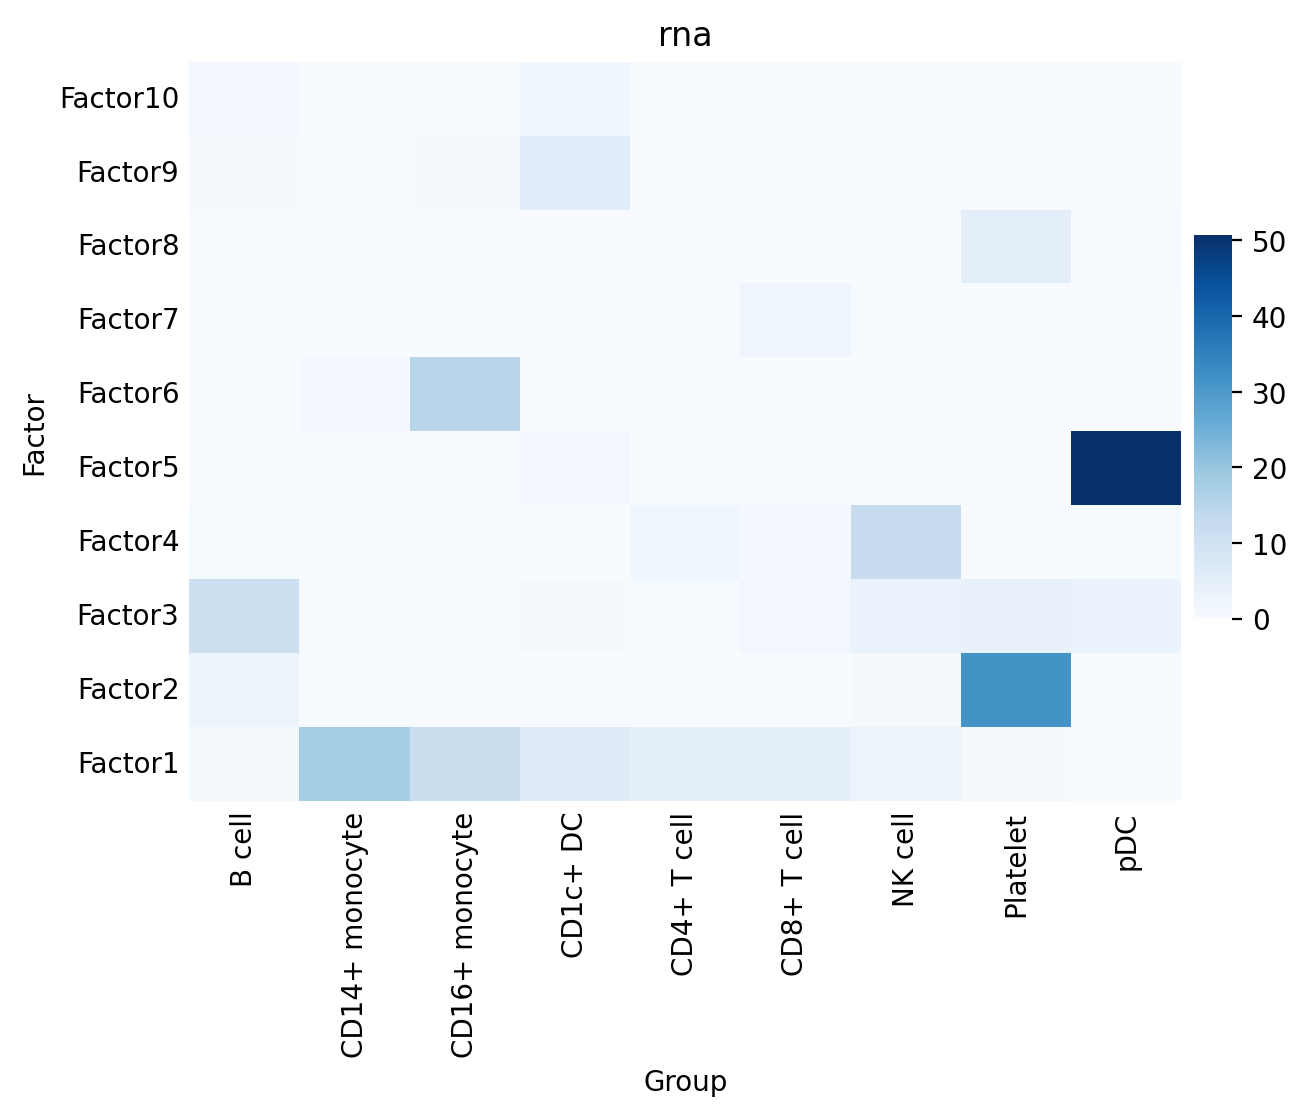

In [44]:
mfx.plot_r2(m, factors=list(range(10)),
            cmap="Blues",
            group_label="celltype")

/usr/local/lib/python3.11/dist-packages/mofax/plot_variance.py:274: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.xaxis.get_ticklabels(), rotation=90, size=xticklabels_size)


<Axes: xlabel='Factor', ylabel='R2'>

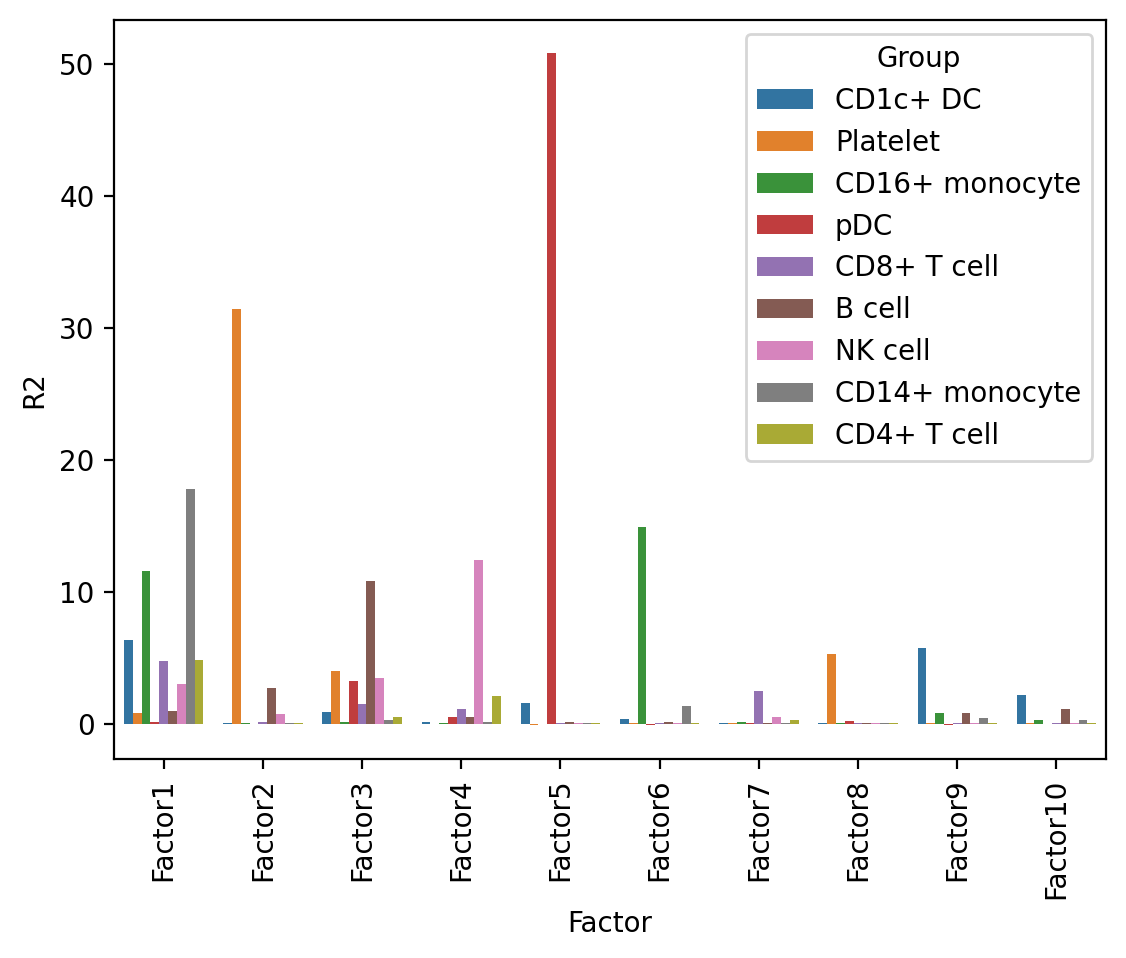

In [47]:
mfx.plot_r2_barplot(m, group_label="celltype", factors=list(range(10)))

<Axes: xlabel='Factor', ylabel='R2'>

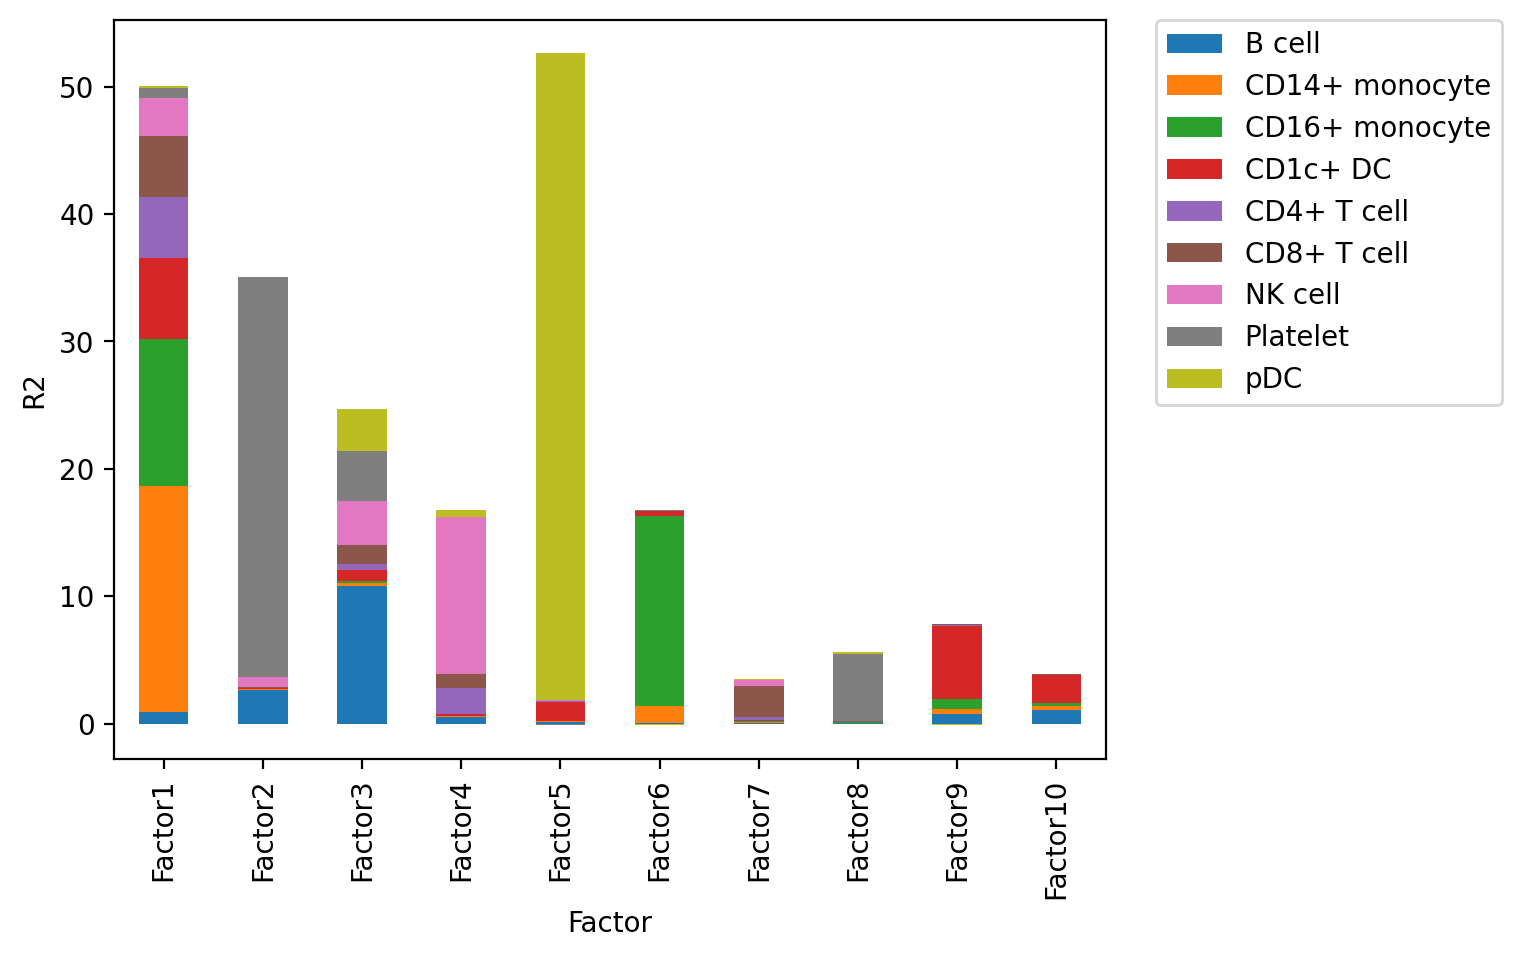

In [48]:
mfx.plot_r2_barplot(m, group_label="celltype", factors=list(range(10)), stacked=True)

/usr/local/lib/python3.11/dist-packages/mofax/plot_variance.py:274: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.xaxis.get_ticklabels(), rotation=90, size=xticklabels_size)


<Axes: xlabel='Group', ylabel='R2'>

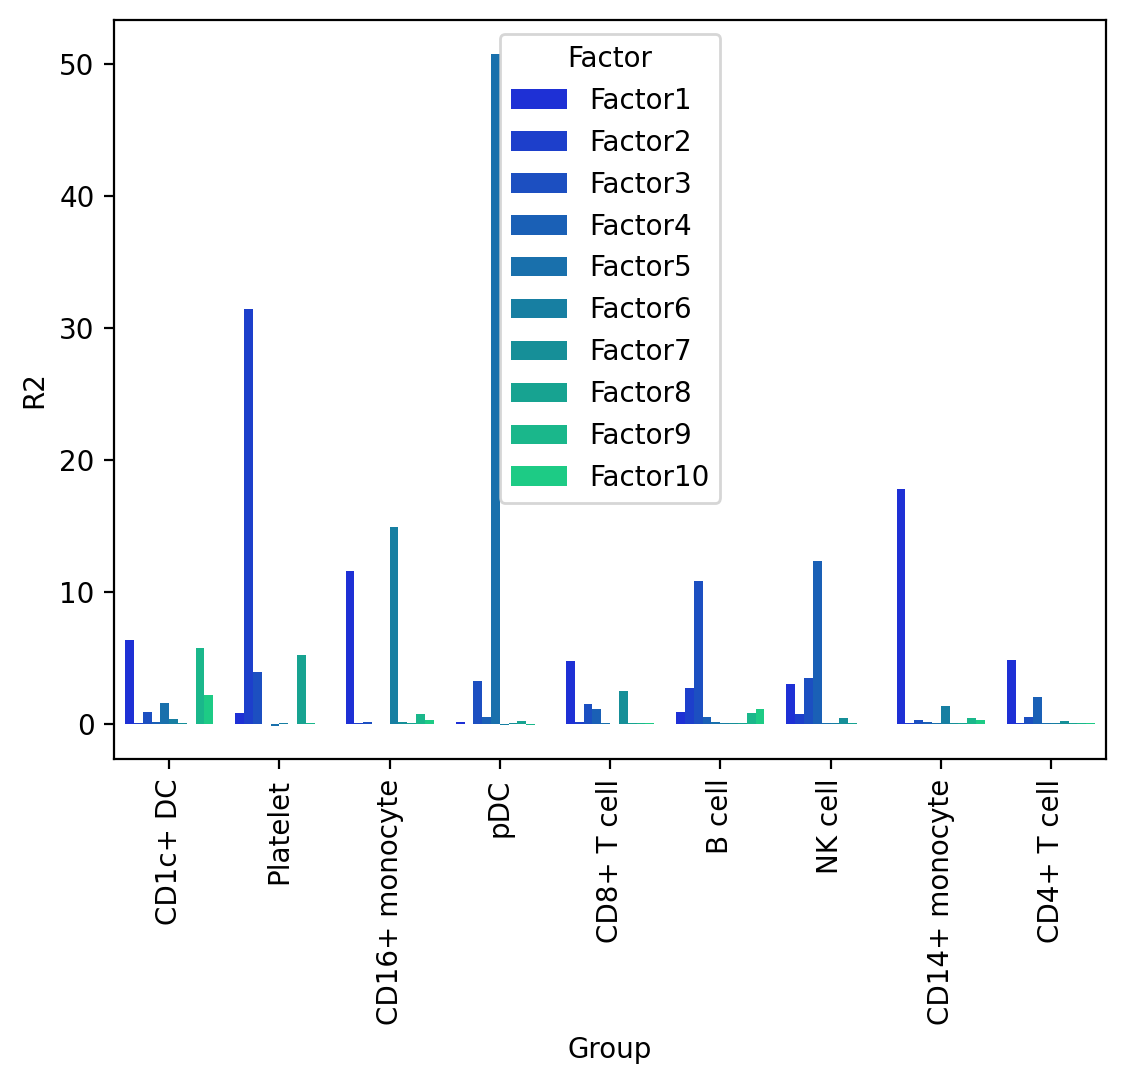

In [49]:
	mfx.plot_r2_barplot(m, factors=list(range(10)), x="Group", groupby="Factor",
                    group_label="celltype",
                    palette="winter")

<Axes: xlabel='Group', ylabel='Factor'>

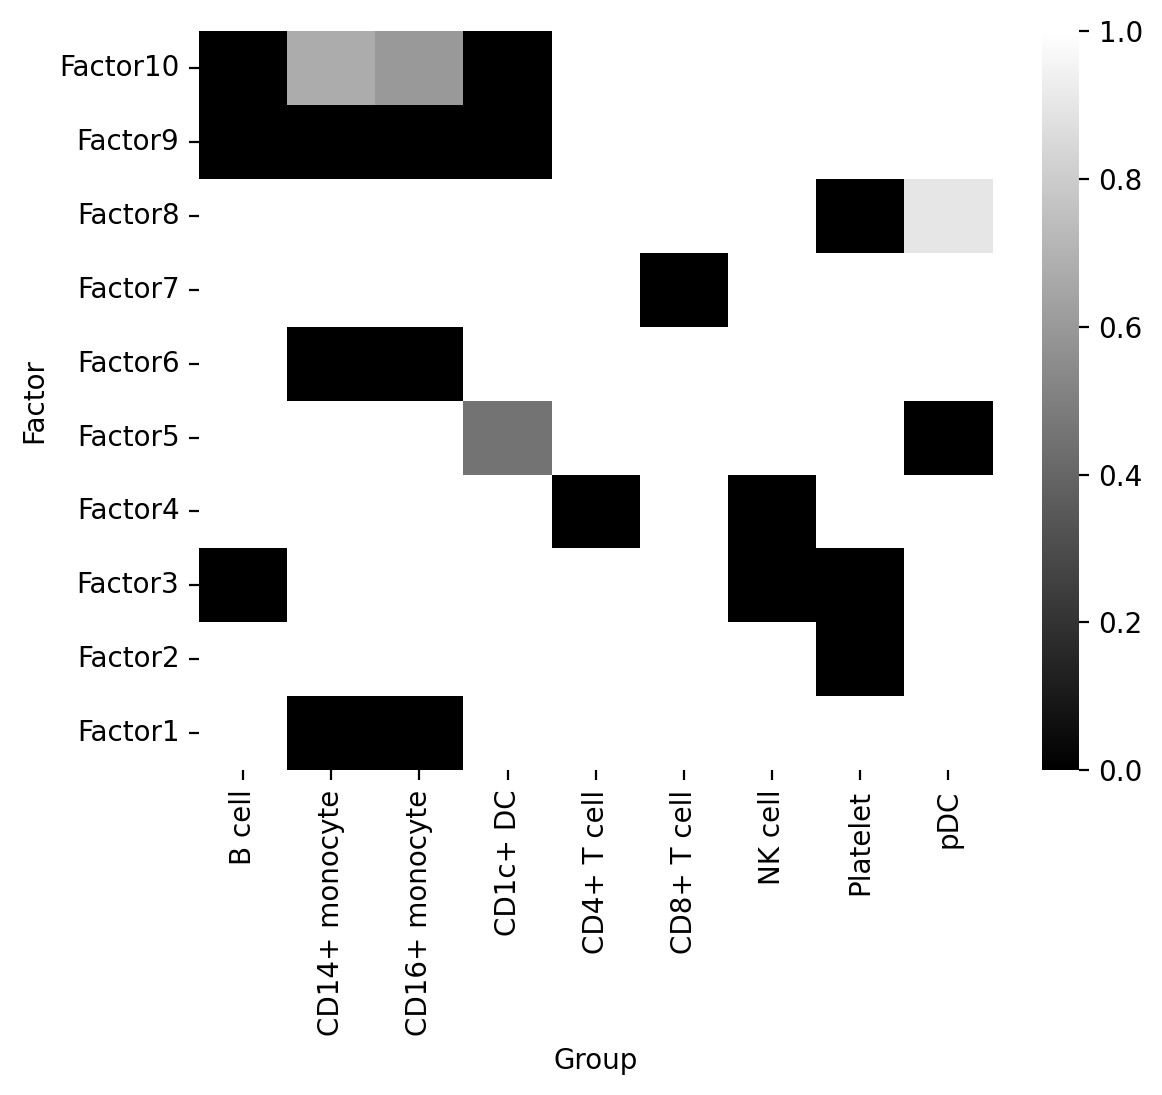

In [51]:
mfx.plot_r2_pvalues(m, group_label="celltype", factors=list(range(10)), n_iter=10)

<Axes: title={'center': 'celltype'}, xlabel='Factor1', ylabel='Factor2'>

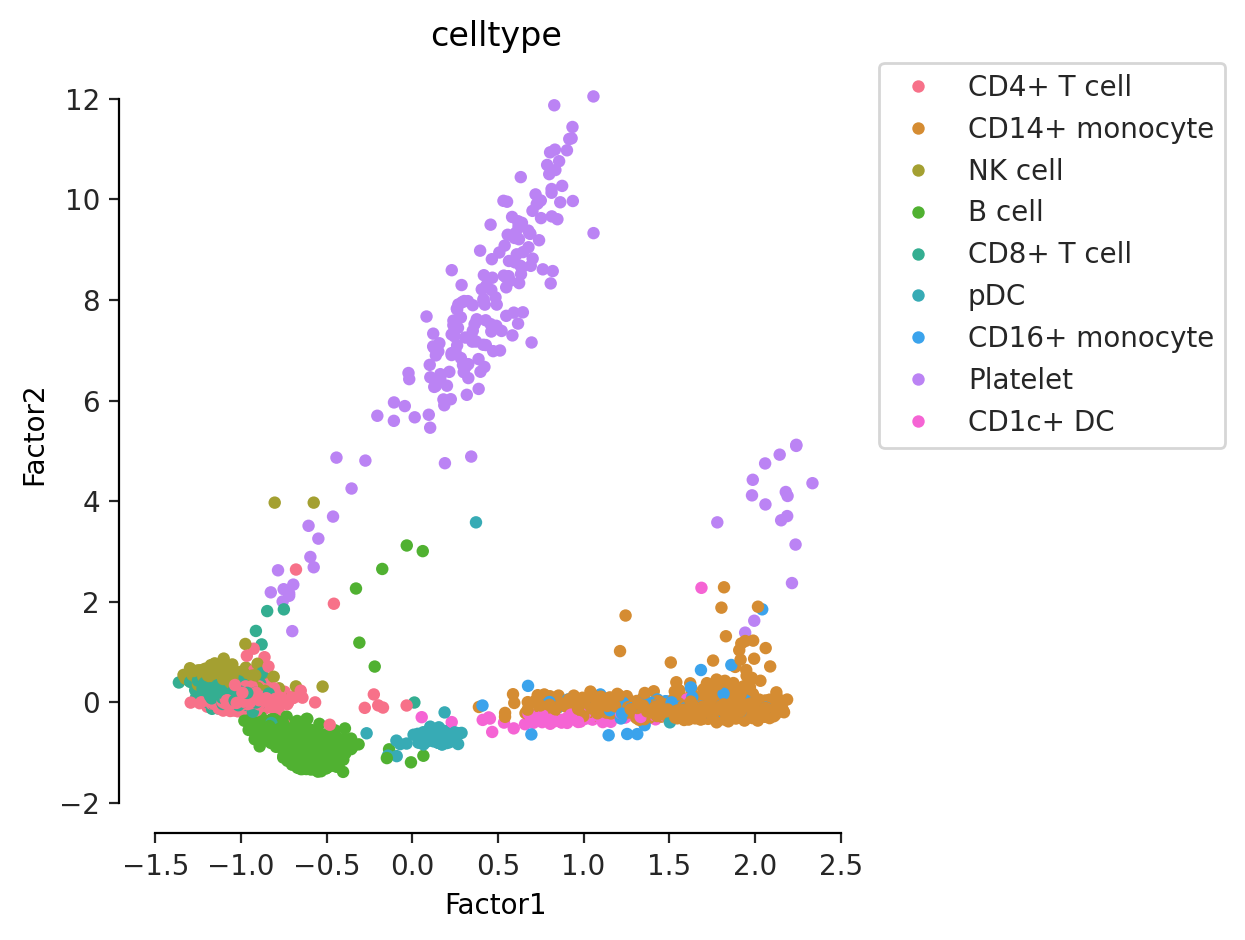

In [52]:
mfx.plot_factors_scatter(m, color='celltype')

<Axes: title={'center': 'Factor5'}, xlabel='Factor1', ylabel='Factor5'>

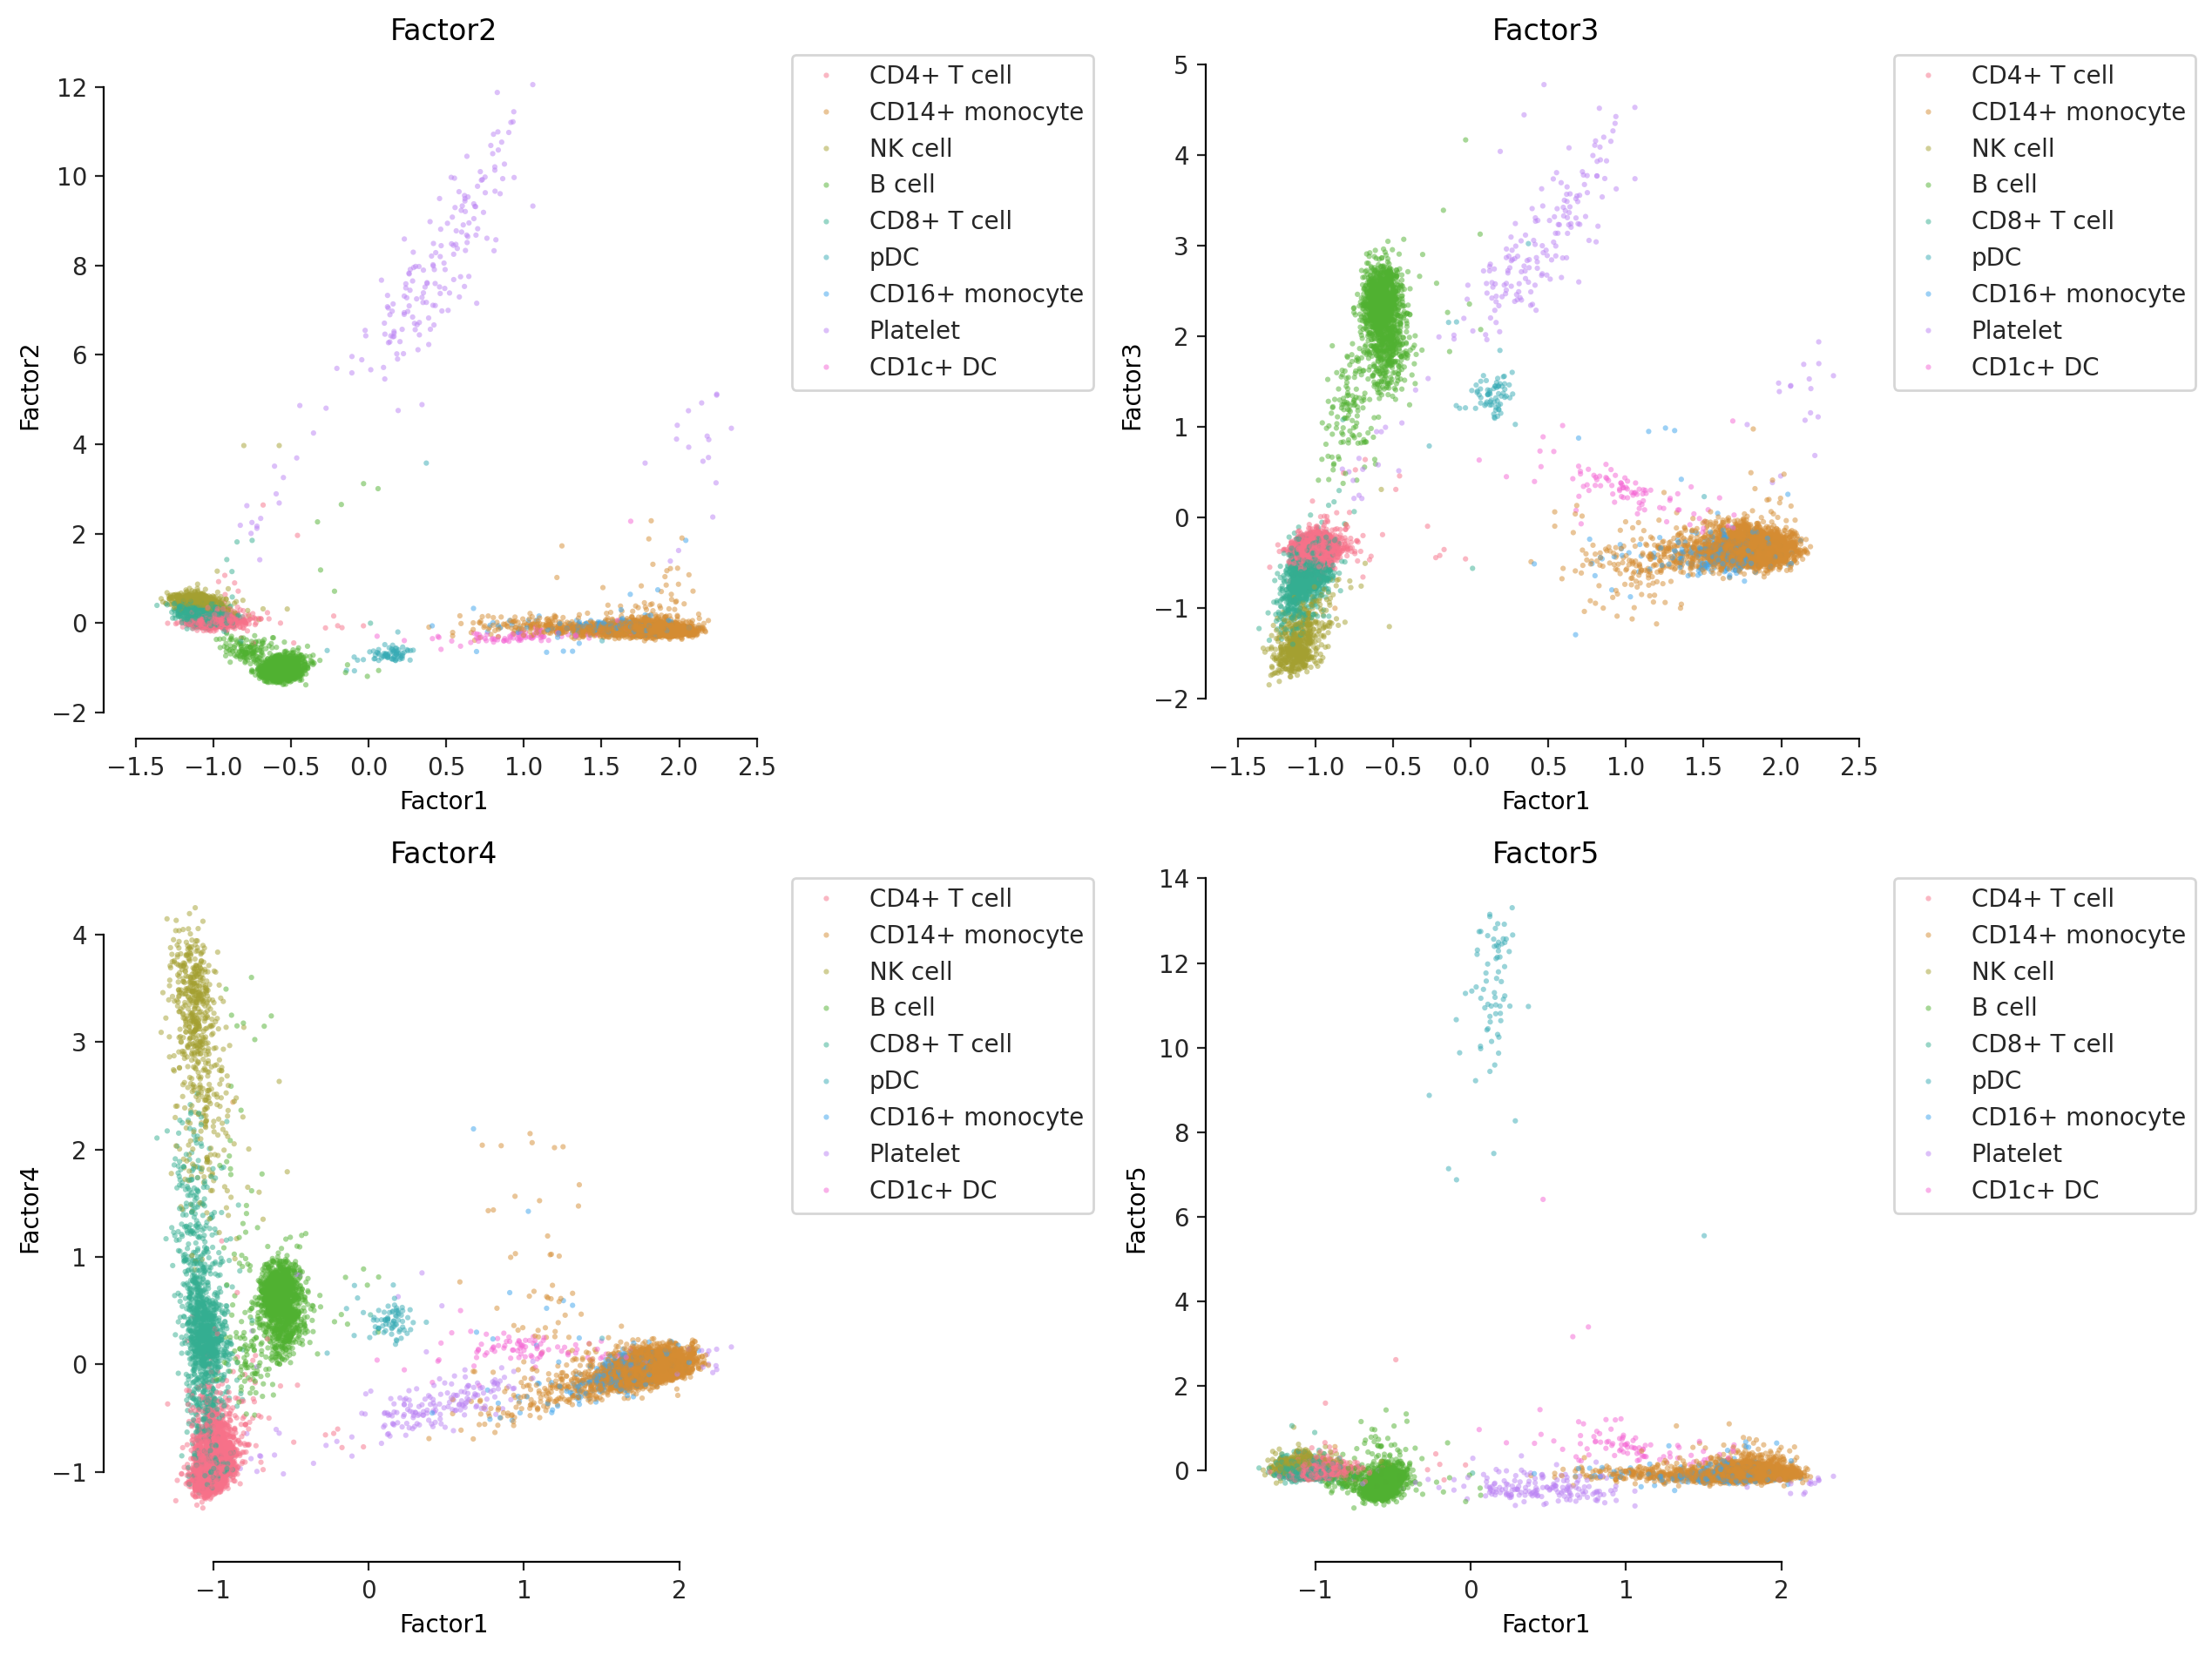

In [53]:
mfx.plot_factors_scatter(m, x=0, y=range(1, 5),
                         size=5, alpha=.5,
                         color="celltype",
                         legend='brief', ncols=2)

<Axes: title={'center': 'Factor4'}, xlabel='celltype', ylabel='Factor4'>

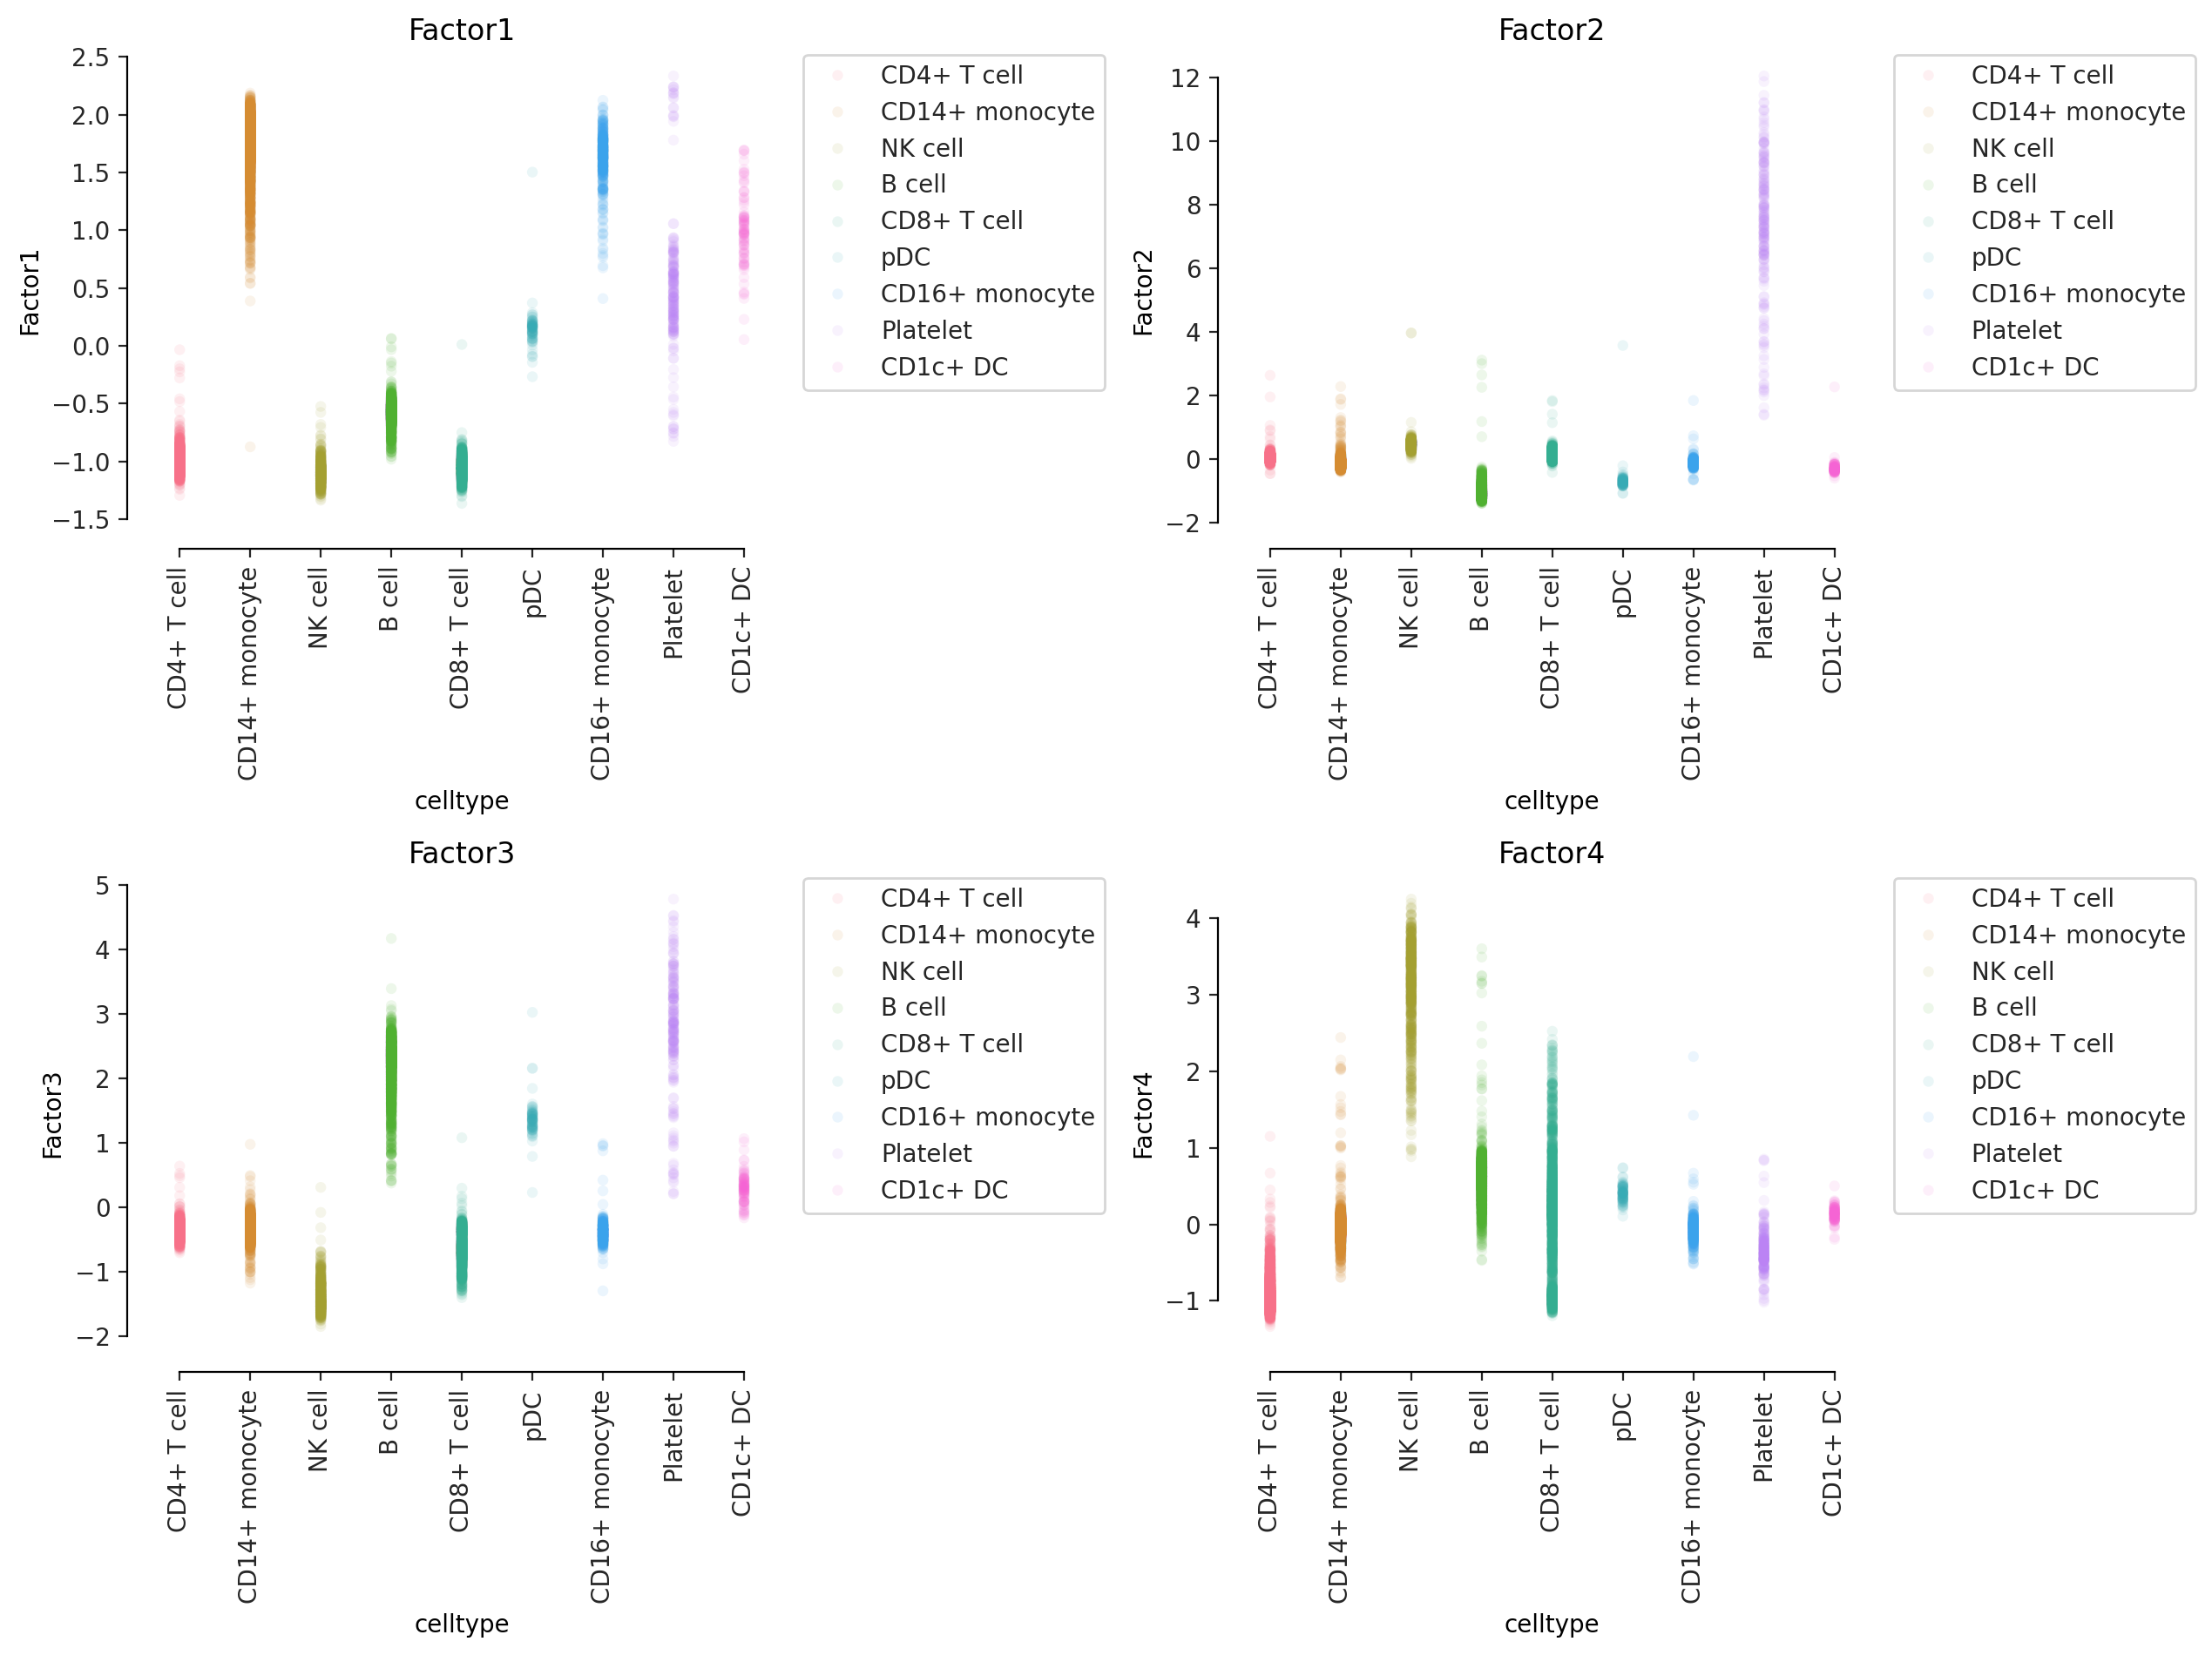

In [54]:
mfx.plot_factors_scatter(
    m,
    x="celltype", y=range(4), group_label="celltype", color='celltype',
    alpha=.1,
    rotate_x_labels=90, ncols=2,
)

/usr/local/lib/python3.11/dist-packages/mofax/plot_factors.py:152: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


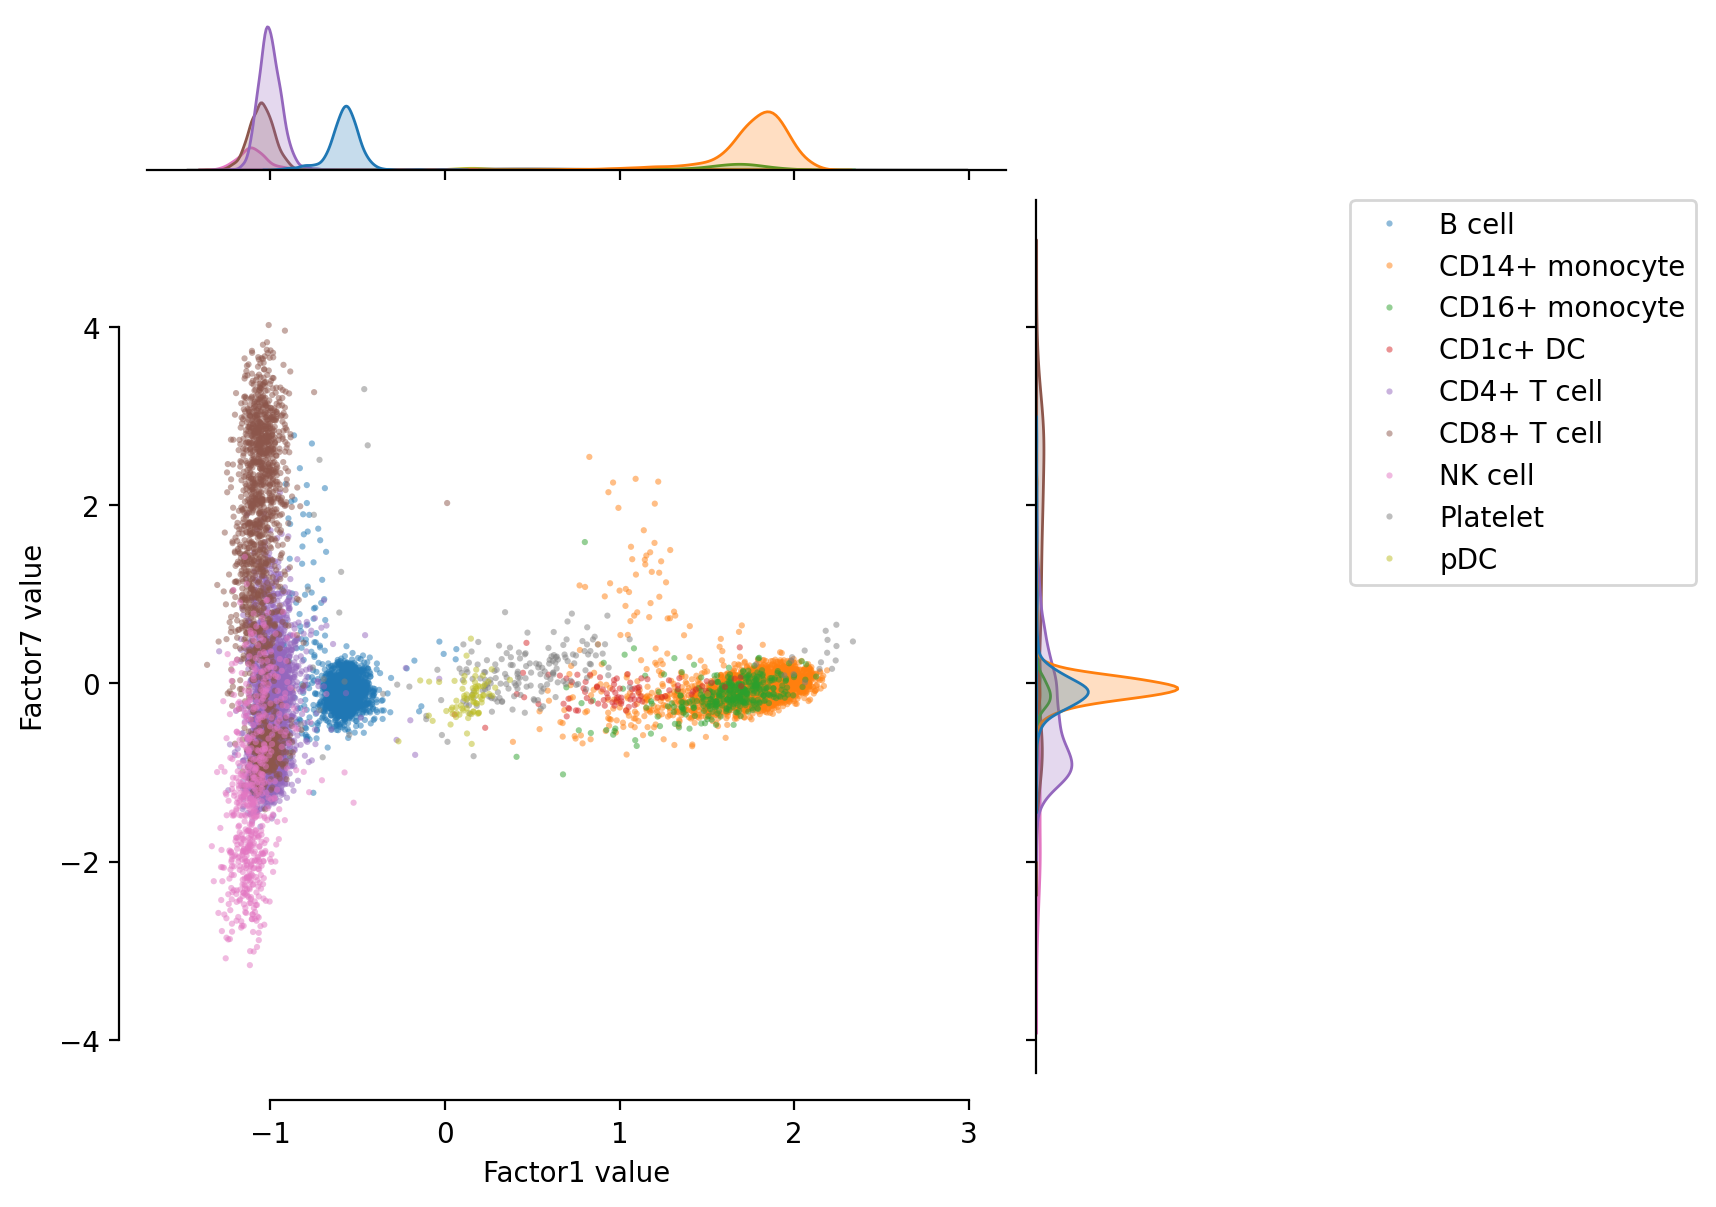

In [55]:
mfx.plot_factors_scatter(m, x="Factor1", y="Factor7",
                         size=5, alpha=.5,
                         dist=True,
                         color="celltype")

In [56]:
g = m.get_cells().set_index("cell")

<Axes: xlabel='Group', ylabel='Factor'>

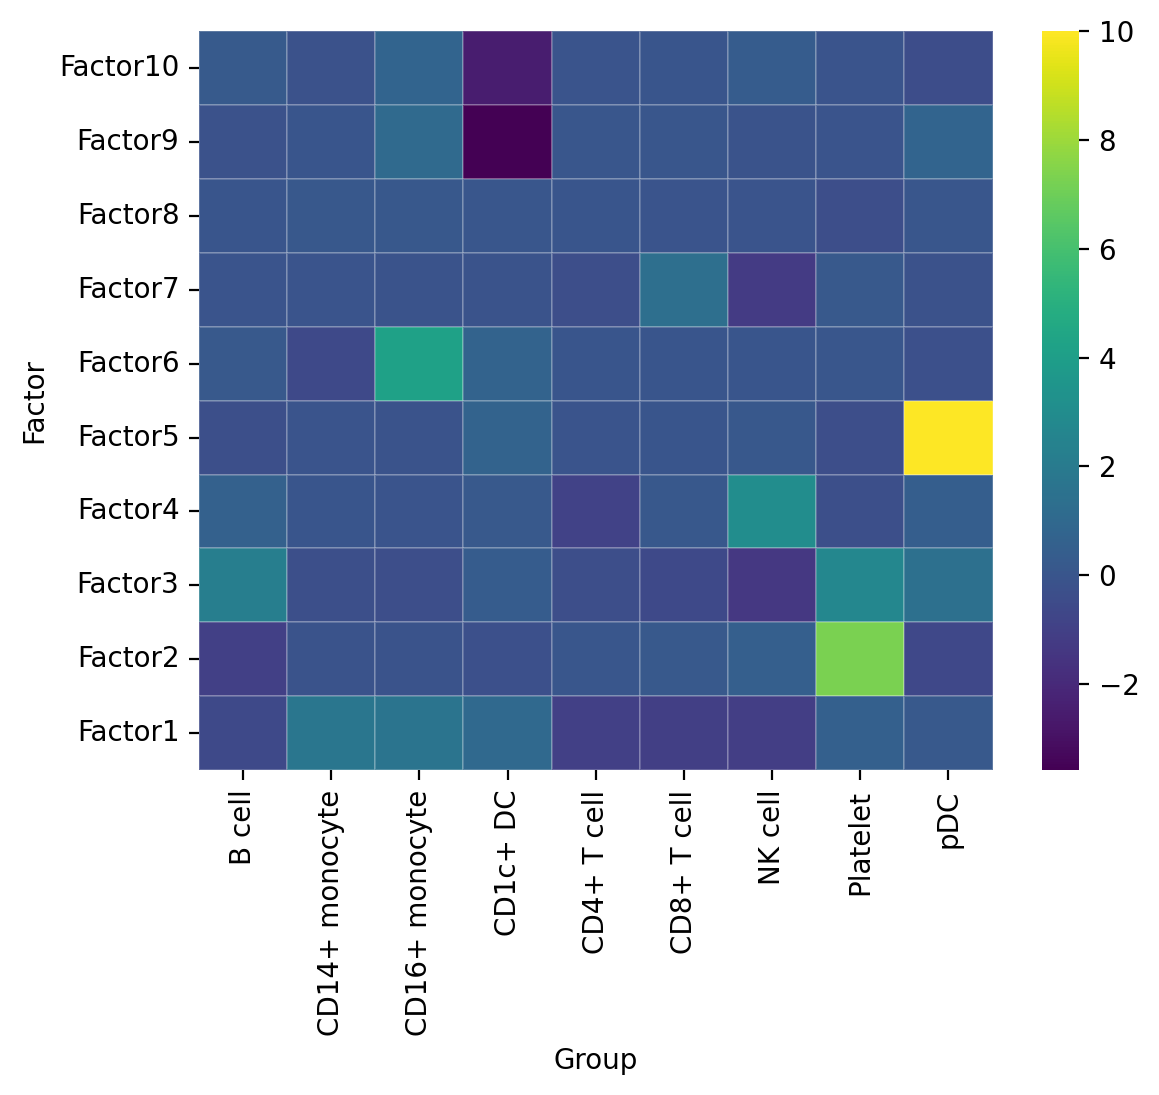

In [57]:
mfx.plot_factors_matrix(m, agg="mean", factors=list(range(10)),
                            linewidths=0.01, linecolor="#FFFFFF33",
                            vmax=10,
                            group_label="celltype")

Text(0.5, 1.0, 'Pearson r')

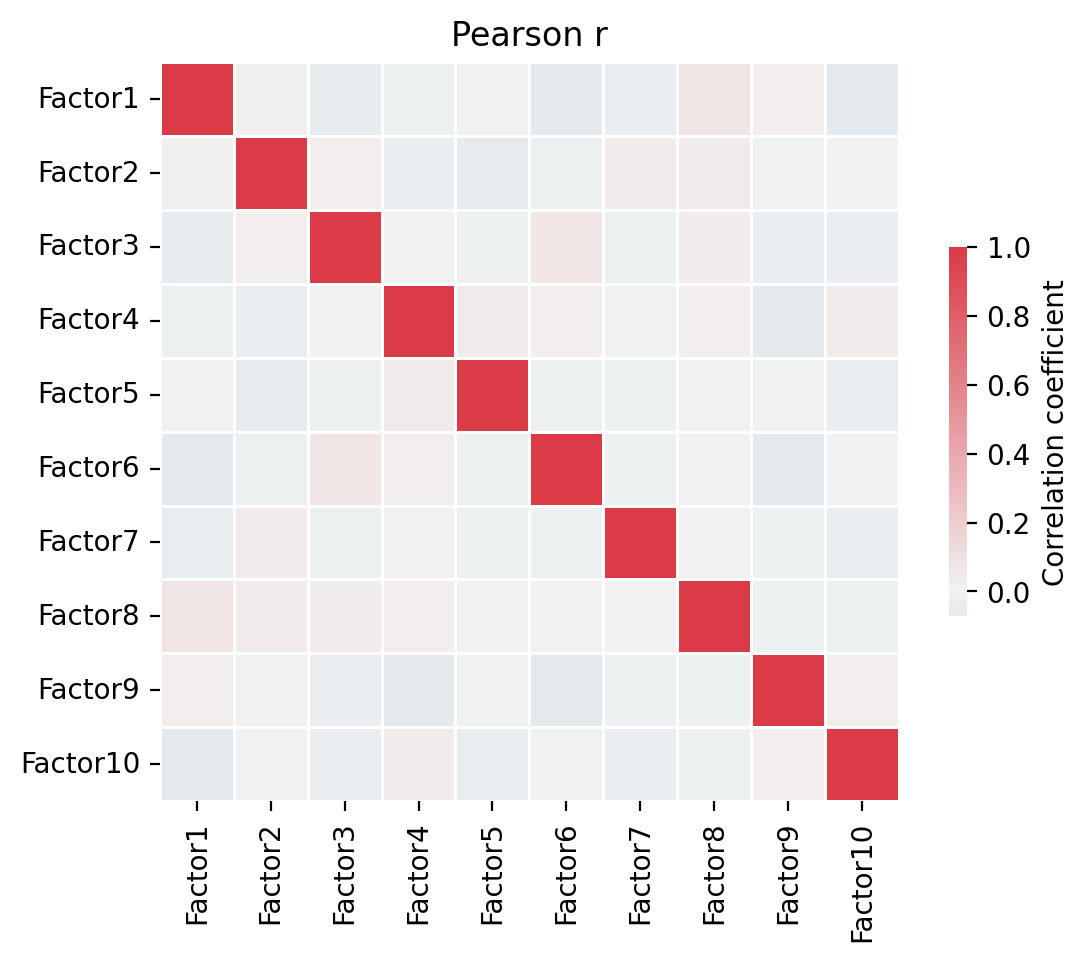

In [58]:
mfx.plot_factors_correlation(m); plt.title("Pearson r")

In [59]:
pd.get_dummies(m.metadata.celltype)

B cell  CD14+ monocyte  CD16+ monocyte  CD1c+ DC  \
sample                                                                 
AAACCCAAGCGCCCAT-1   False           False           False     False   
AAACCCACAGAGTTGG-1   False            True           False     False   
AAACCCACAGGTATGG-1   False           False           False     False   
AAACCCACATAGTCAC-1    True           False           False     False   
AAACCCACATCCAATG-1   False           False           False     False   
...                    ...             ...             ...       ...   
TTTGTTGGTGCGTCGT-1   False           False           False     False   
TTTGTTGGTGTCATGT-1   False            True           False     False   
TTTGTTGGTTTGAACC-1   False           False           False     False   
TTTGTTGTCCAAGCCG-1   False           False           False     False   
TTTGTTGTCTTACTGT-1   False           False           False     False   

                    CD4+ T cell  CD8+ T cell  NK cell  Platelet    pDC  
sample                                                                  
AAACCCAAGCGCCCAT-1         True        False    False     False  False  
AAACCCACAGAGTTGG-1        False        False    False     False  False  
AAACCCACAGGTATGG-1        False        False     True     False  False  
AAACCCACATAGTCAC-1        False        False    False     False  False  
AAACCCACATCCAATG-1        False        False     True     False  False  
...                         ...          ...      ...       ...    ...  
TTTGTTGGTGCGTCGT-1         True        False    False     False  False  
TTTGTTGGTGTCATGT-1        False        False    False     False  False  
TTTGTTGGTTTGAACC-1        False         True    False     False  False  
TTTGTTGTCCAAGCCG-1         True        False    False     False  False  
TTTGTTGTCTTACTGT-1         True        False    False     False  False  

[10575 rows x 9 columns]

Text(0.5, 1.0, 'Pearson r')

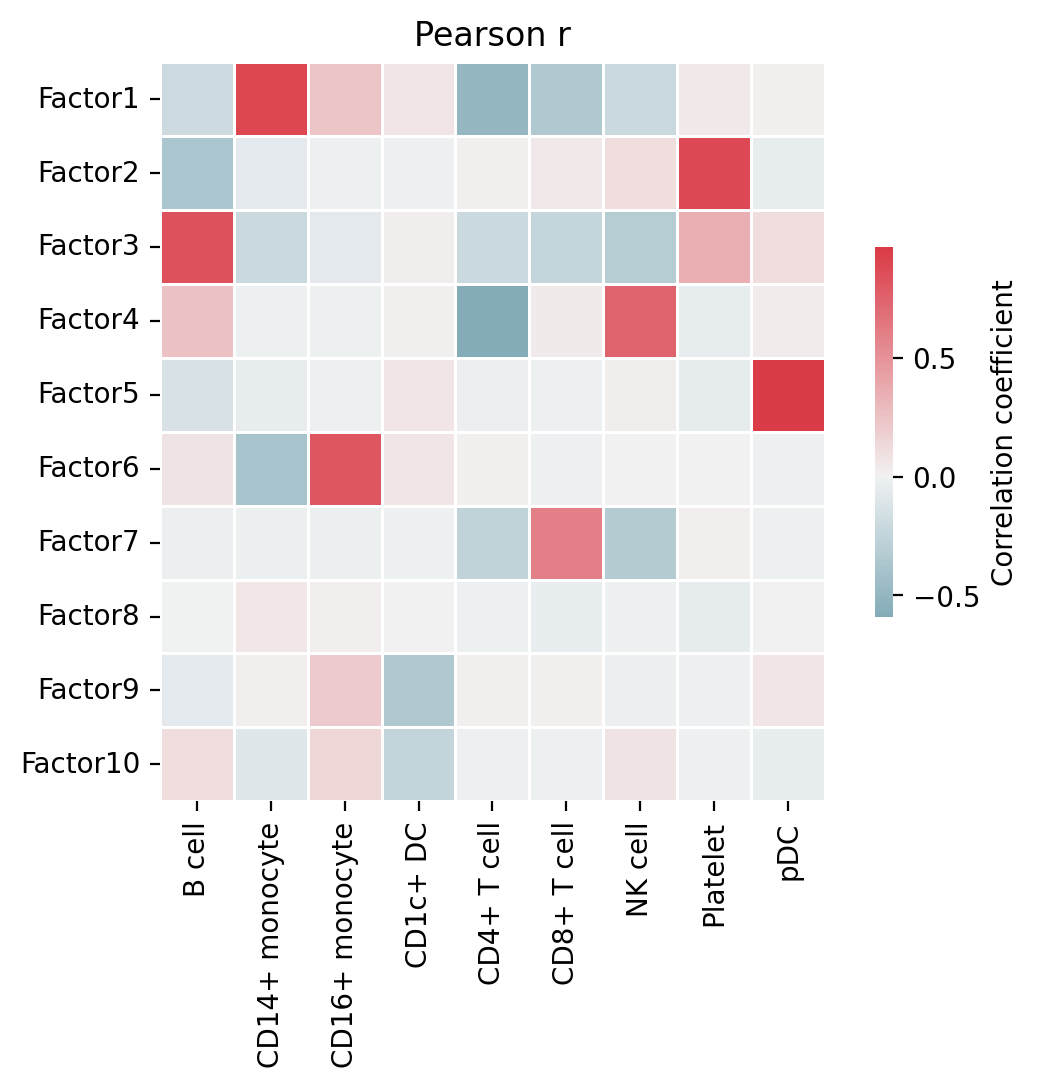

In [60]:
mfx.plot_factors_covariates_correlation(m, covariates=pd.get_dummies(m.metadata.celltype)); plt.title("Pearson r")

/usr/local/lib/python3.11/dist-packages/mofax/plot_factors.py:850: RuntimeWarning: divide by zero encountered in log10
  corr = -np.log10(corr)
/usr/local/lib/python3.11/dist-packages/mofax/plot_factors.py:853: UserWarning: Some p-values are 0, these values will be capped.
  warn("Some p-values are 0, these values will be capped.")


<Axes: >

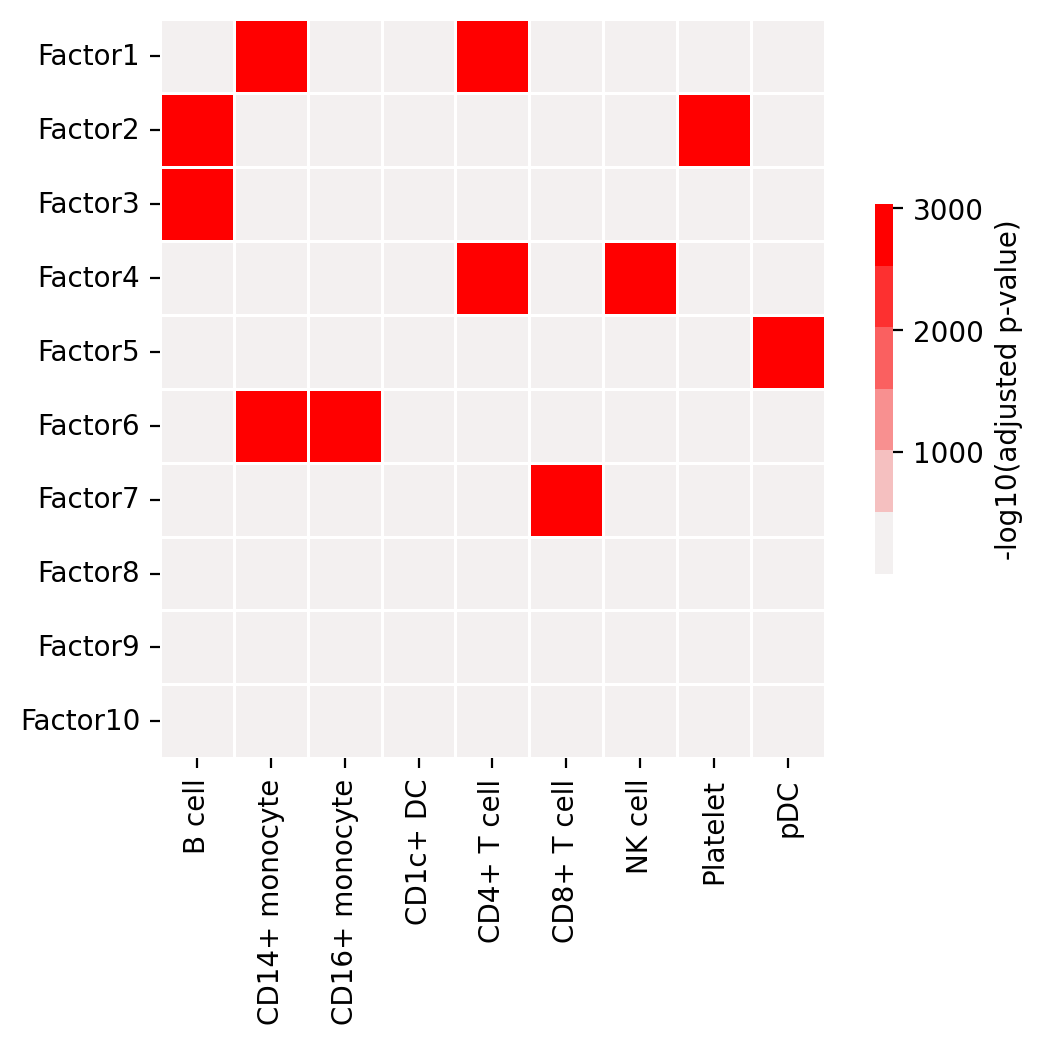

In [61]:
mfx.plot_factors_covariates_correlation(m, covariates=pd.get_dummies(m.metadata.celltype), pvalues=True, cmap=sns.light_palette("#FF0000"))

In [62]:
m

MOFA+ model: pbmc10k
Samples (cells): 10575
Features: 2071
Groups: group1 (10575)
Views: rna (2071)
Factors: 10
Expectations: W, Z